In [1]:
# all import statements 

import logging
logger = logging.getLogger()
logger.setLevel('INFO')
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 20)
import networkx as nx
from sklearn.preprocessing import minmax_scale

# importing own modules
import comment_thread as ct
import author_network as an
import multi_comment_thread as mct
from notebook_helper.process_data import *
from notebook_helper.access_funs import *
from plotting.threads import *
from plotting.network import *
from plotting.overview import *
from plotting.heatmap import *
from plotting.components import *

SBSTYLE = an.SETTINGS['style']
sns.set_style('white')

%load_ext autoreload
%autoreload 2

In [8]:
PM_FRAME = concatenate_project_dfs(
            process_pms(*range(1, 14)))
ALL_AUTHORS = set.union(*PM_FRAME['all threads', 'authors'].tolist())

<div id="div-comment-115409">
<div class="comment-author vcard">
<img alt="" class="avatar avatar-32" height="32" src="https://1.gravatar.com/avatar/a23b9df554f5ee2e60fdc13645e4c50d?s=32&amp;d=identicon&amp;r=G" width="32"/> <p>Jeff Kahn mentioned to me the beautiful “<a href="http://www.openproblemgarden.org/op/wide_partition_conjecture" rel="nofollow">Wide Partition Conjecture</a>” from the paper: T. Chow, C.K. Fan, M.X. Goemans and J. Vondrak, <cite>Wide Partitions, Latin Tableaux, and Rota’s Basis Conjecture</cite>, Advances in Applied Mathematics, 31, 334–358, 2003. <a href="http://math.mit.edu/~goemans/PAPERS/wide.pdf" rel="nofollow">pdf</a> . (I think this conjecture might be interesting also in the Tverberg context we mensioned above.) Perhaps, Tim, you can explain and motivate this conjecture and its relation to Rota’s conjecture?</p>
<div class="pd-rating" id="pd_rating_holder_133283_comm_115409"></div> <p><cite>Comment by <span class="fn"><a class="url" href="http://www.ma.h

Rota’s Basis Conjecture: Polymath 12, post 3
Rota‘s Basis Conjecture: Poltmath 12, post 3



# 1. General overview
## 1.1. Size of the projects

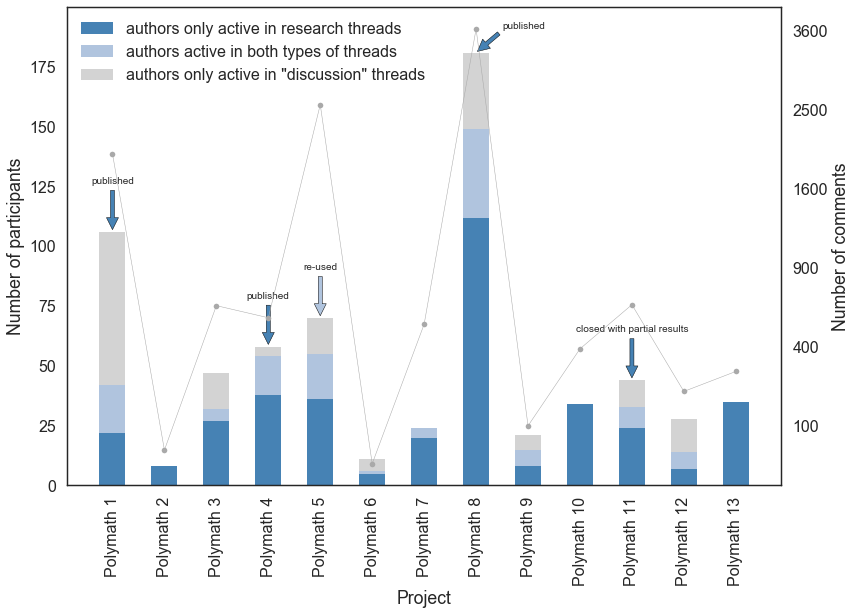

In [9]:
plot_overview(PM_FRAME, annotate=True)

# 2. Polymath as a community

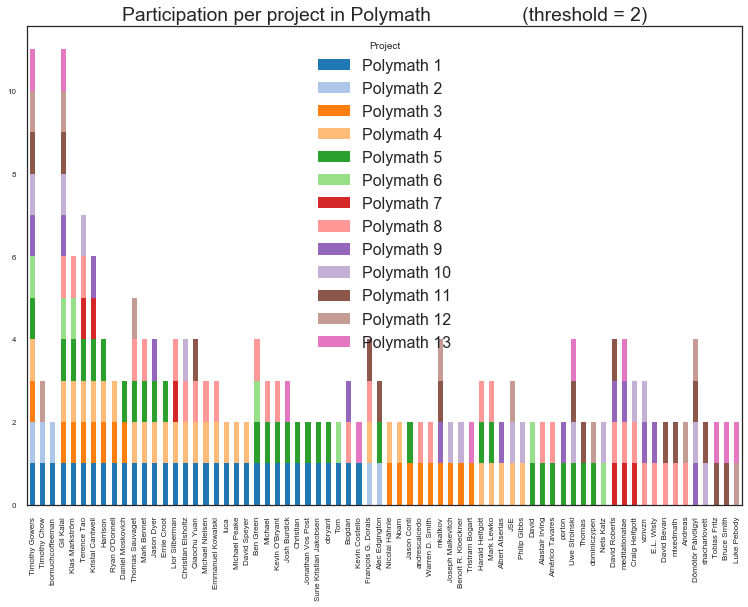

In [35]:
author_project_all, indices_all, select_2_all, title_all = project_participation_evolution(PM_FRAME, ALL_AUTHORS, research_only=False)
plot_participation_evolution(author_project_all, indices_all, select_2_all, title_all, fontsize=8)

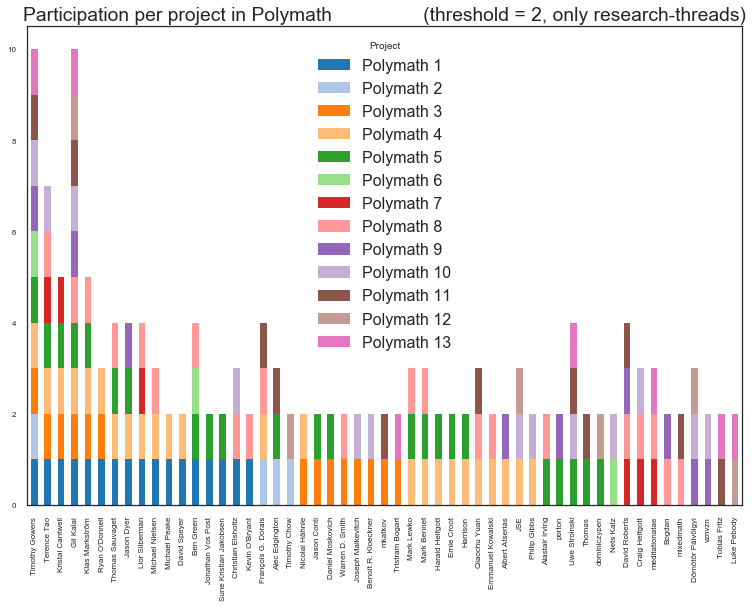

In [36]:
author_project_res, indices_res, select_2_res, title_res = project_participation_evolution(PM_FRAME, ALL_AUTHORS, research_only=True)
plot_participation_evolution(author_project_res, indices_res, select_2_res, title_res, fontsize=8)

### All thread-types, lexicographically ordered

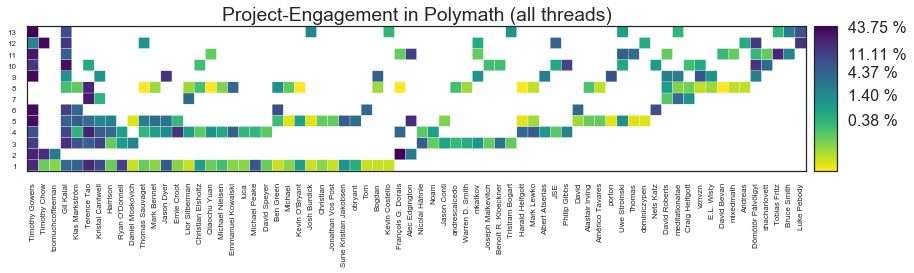

In [37]:
authors_2_all = [author for author, bool in select_2_all.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_all,
                              thread_level=False, cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

### All thread-types, clustered

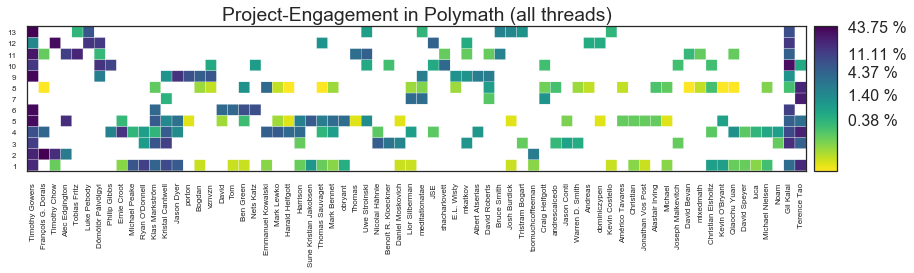

In [38]:
authors_2_all = sorted(authors_2_all)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_all,
                              thread_level=False, cluster_projects=False,
                              binary=False,
                              scale_data=True),
             log=True)

### Research-threads, lexicographically ordered

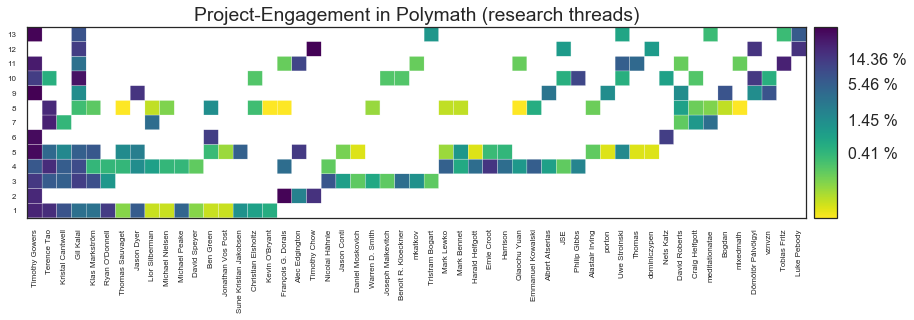

In [39]:
authors_2_res = [author for author, bool in select_2_res.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

### Research-threads, clustered

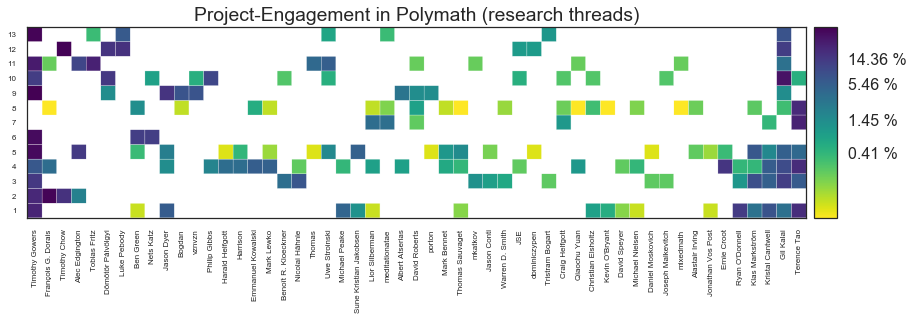

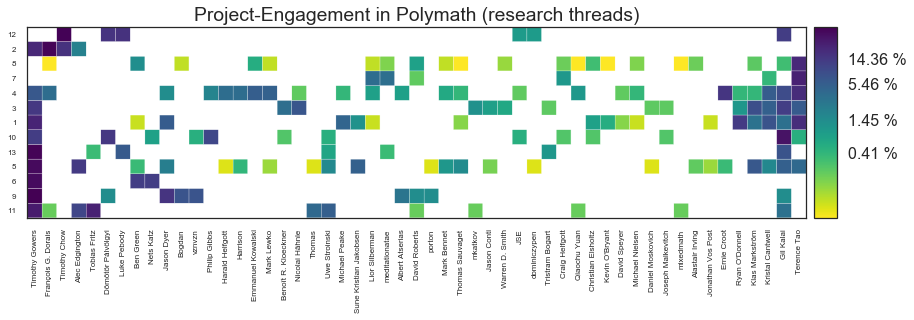

In [40]:
authors_2_res = sorted(authors_2_res)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              binary=False,
                              scale_data=True),
             log=True)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=True,
                              binary=False,
                              scale_data=True),
             log=True)

### No selection on authors applied

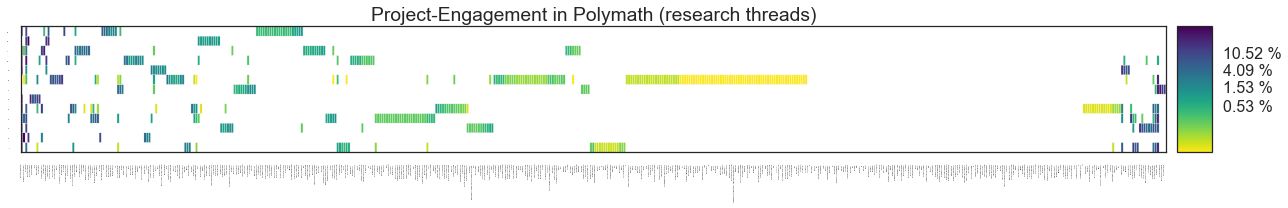

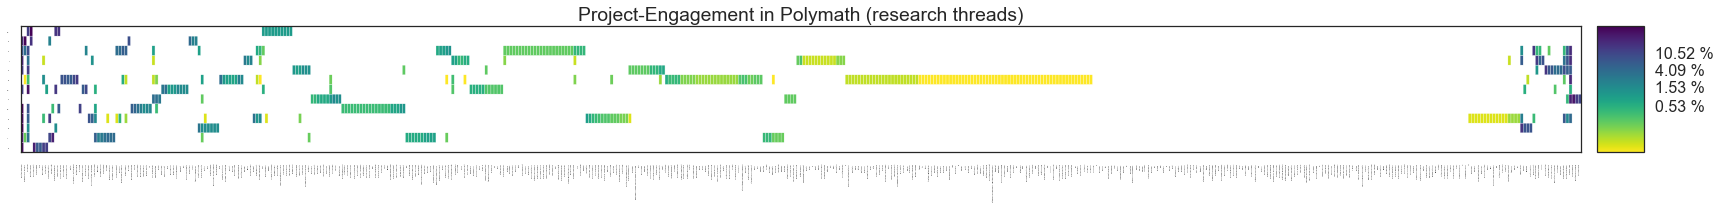

In [41]:
#_, _, select_1_res, _ = project_participation_evolution(PM_FRAME, ALL_AUTHORS, research_only=True)
authors_1_res = sorted(ALL_AUTHORS)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_1_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              binary=False,
                              scale_data=True),
             log=True, equal=False, figsize=(18,3), fontsize=2)
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_1_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=True,
                              binary=False,
                              scale_data=True),
             log=True, equal=False, figsize=(24,3), fontsize=2)

### Is there any link between contributing much, and being a long-time participant?

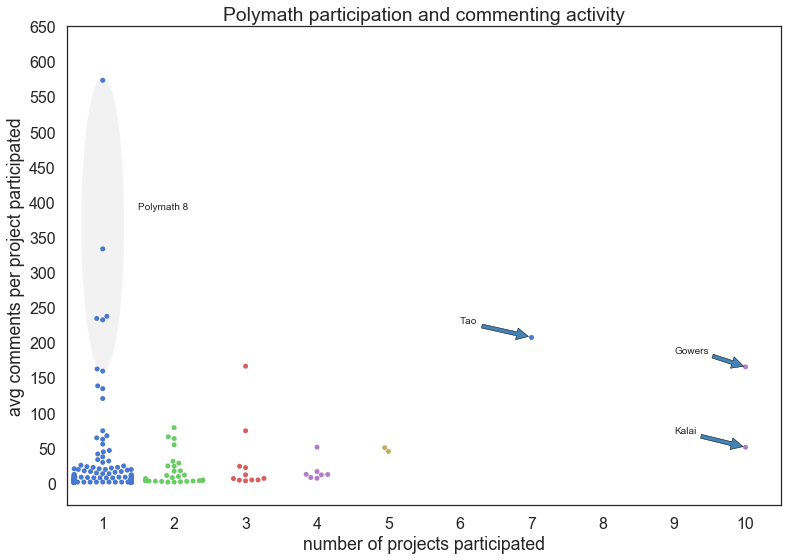

In [308]:
project_data = plot_scatter_author_activity_projects(PM_FRAME, ALL_AUTHORS)

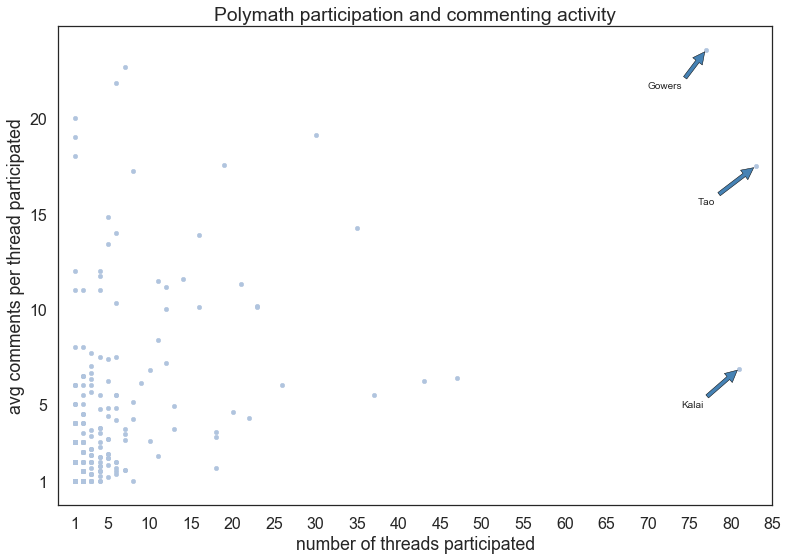

In [307]:
thread_data = plot_scatter_author_activity_threads(PM_FRAME, ALL_AUTHORS)

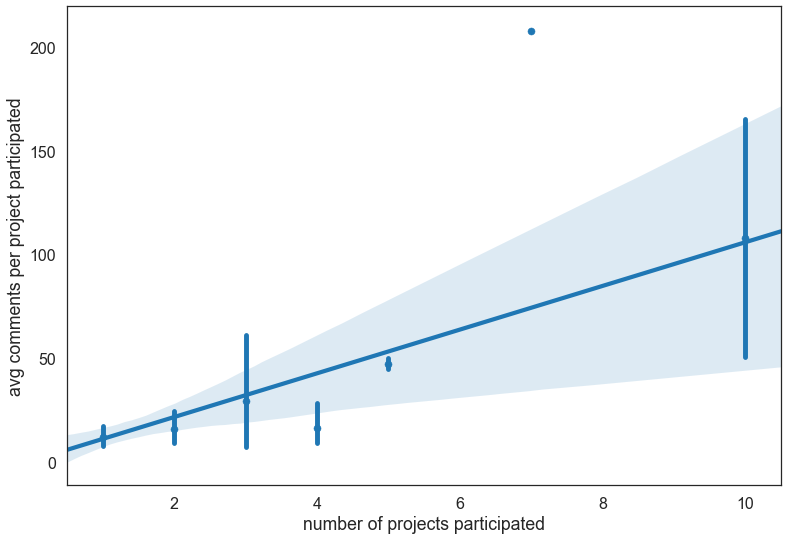

In [189]:
sns.regplot(x="number of projects participated", y="avg comments per project participated",
            data=project_data, x_estimator=np.mean)

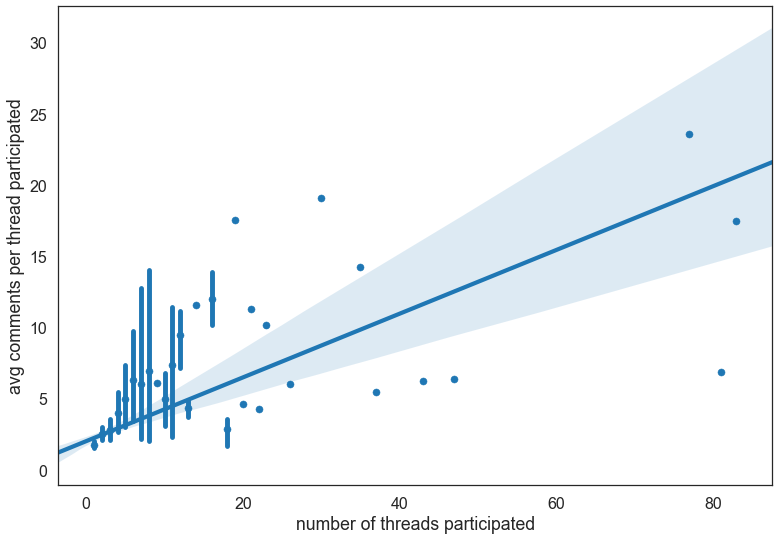

In [191]:
sns.regplot(x="number of threads participated", y="avg comments per thread participated",data=thread_data,x_estimator=np.mean)

### Network-properties of projects

In [44]:
GRAPH_DATA = DataFrame({'research': get_last(PM_FRAME, "research threads")[0]['research threads', 'network'],
                        'discussion': get_last(PM_FRAME, "discussion threads")[0]['discussion threads', 'network'],
                        'all': get_last(PM_FRAME, "all threads")[0]['all threads', 'network']})

def get_graph(netw, netw_type='i_graph'):
    try:
        out = getattr(netw, netw_type)
    except AttributeError:
        out = np.nan
    return out

GRAPH_DATA["research interaction graph"] = GRAPH_DATA["research"].apply(get_graph)
GRAPH_DATA["research cluster graph"] = GRAPH_DATA["research"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA["discussion interaction graph"] = GRAPH_DATA["discussion"].apply(get_graph)
GRAPH_DATA["discussion cluster graph"] = GRAPH_DATA["discussion"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA["interaction graph"] = GRAPH_DATA["all"].apply(get_graph)
GRAPH_DATA["cluster graph"] = GRAPH_DATA["all"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA = GRAPH_DATA[["interaction graph", "research interaction graph", "discussion interaction graph",
                         "cluster graph", "research cluster graph", "discussion cluster graph"]]
GRAPH_DATA.index = GRAPH_DATA.index.droplevel(1)
GRAPH_DATA = GRAPH_DATA.groupby(GRAPH_DATA.index).last()
GRAPH_DATA = GRAPH_DATA.reindex(['Polymath {}'.format(i) for i in range(1, 13)])

In [45]:
def safe_netw_fun(graph, measure=None, pre_process=None, weight="weight"):
    if pre_process:
        pre_process = methodcaller(pre_process)
        graph=pre_process(graph)
    try:
        out = measure(graph, weight=weight)
    except:
        out = np.nan
    return out

avg_clustering = partial(safe_netw_fun,
                         measure=nx.average_clustering,
                         pre_process="to_undirected")

comments = get_last(PM_FRAME, "all threads")[0]['all threads', 'number of comments (accumulated)']
participants = get_last(PM_FRAME, "all threads")[0]['all threads', 'authors (accumulated)'].apply(len)

r_comments = get_last(PM_FRAME, "research threads")[0]['research threads', 'number of comments (accumulated)']
r_participants = get_last(PM_FRAME, "research threads")[0]['research threads', 'authors (accumulated)'].apply(len)

comments.index = comments.index.droplevel(1)
participants.index = participants.index.droplevel(1)

r_comments.index = r_comments.index.droplevel(1)
r_participants.index = r_participants.index.droplevel(1)

COMPARE = DataFrame({'cluster_avg': GRAPH_DATA['interaction graph'].apply(avg_clustering),
                     'transitivity': GRAPH_DATA['interaction graph'].apply(nx.transitivity),
                     'comments': comments,
                     'participants': participants})

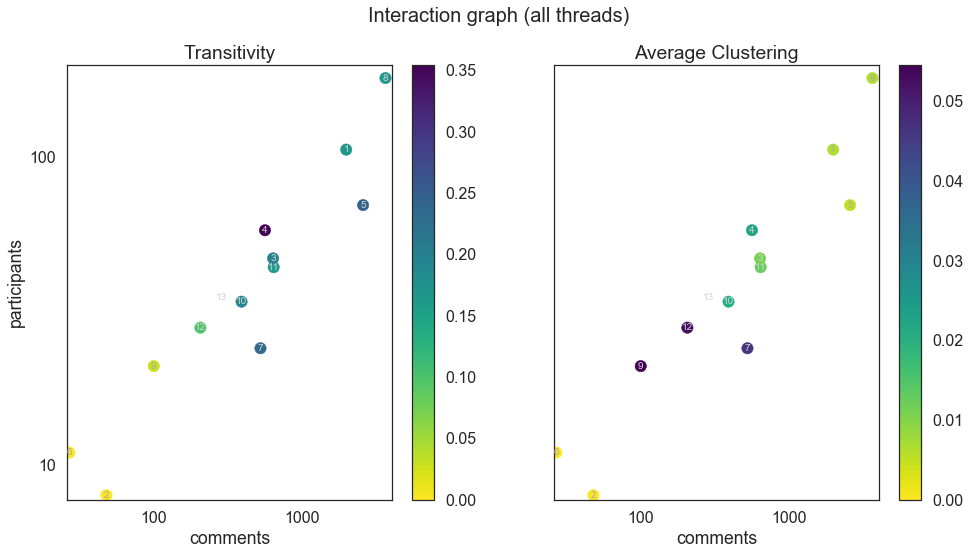

In [49]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

COMPARE.plot(kind="scatter", x="comments", y="participants", c="transitivity", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[0])
COMPARE.plot(kind="scatter", x="comments", y="participants", c="cluster_avg", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[1])

fig.suptitle('Interaction graph (all threads)', fontsize=20)
axes[1].get_yaxis().set_visible(False)
axes[0].set_title('Transitivity')
axes[1].set_title('Average Clustering')
fig.get_axes()[2].set_ylabel('')
fig.get_axes()[3].set_ylabel('')
for i in range(2):
    axes[i].set_ylim([0, 200]);
    axes[i].set_xlim([0, 4000]);
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    axes[i].yaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    for label, coords in COMPARE.iterrows():
        if i == 0 and coords['transitivity'] < 0.06:
            color = "darkgray"
        elif i == 1 and coords['cluster_avg'] < 0.008:
            color = "darkgray"
        else:
            color = "lightgray"
        axes[i].text(coords['comments'], coords['participants'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color=color)

In [50]:
COMPARE2 = DataFrame({'cluster_avg': GRAPH_DATA['cluster graph'].apply(avg_clustering),
                     'transitivity': GRAPH_DATA['cluster graph'].apply(nx.transitivity),
                     'comments': comments,
                     'participants': participants})

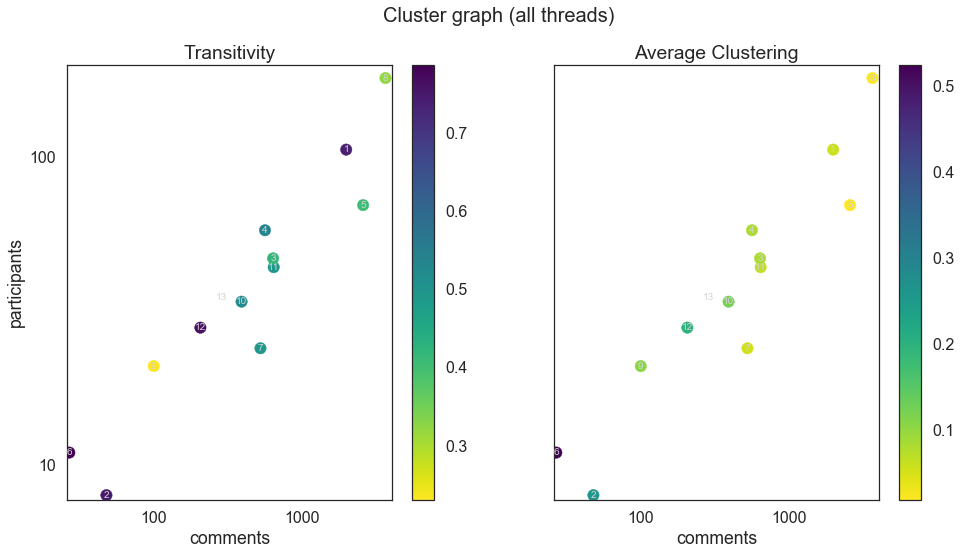

In [51]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

COMPARE2.plot(kind="scatter", x="comments", y="participants", c="transitivity", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[0])
COMPARE2.plot(kind="scatter", x="comments", y="participants", c="cluster_avg", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[1])

fig.suptitle('Cluster graph (all threads)', fontsize=20)
axes[1].get_yaxis().set_visible(False)
axes[0].set_title('Transitivity')
axes[1].set_title('Average Clustering')
fig.get_axes()[2].set_ylabel('')
fig.get_axes()[3].set_ylabel('')
for i in range(2):
    axes[i].set_ylim([0, 200]);
    axes[i].set_xlim([0, 4000]);
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    axes[i].yaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    for label, coords in COMPARE2.iterrows():
        if i == 0 and coords['transitivity'] < 0.06:
            color = "darkgray"
        elif i == 1 and coords['cluster_avg'] < 0.008:
            color = "darkgray"
        else:
            color = "lightgray"
        axes[i].text(coords['comments'], coords['participants'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color=color)

In [52]:
COMPARE3 = DataFrame({'cluster_avg': GRAPH_DATA['research interaction graph'].apply(avg_clustering),
                     'transitivity': GRAPH_DATA['research interaction graph'].apply(nx.transitivity),
                     'comments': r_comments,
                     'participants': r_participants})

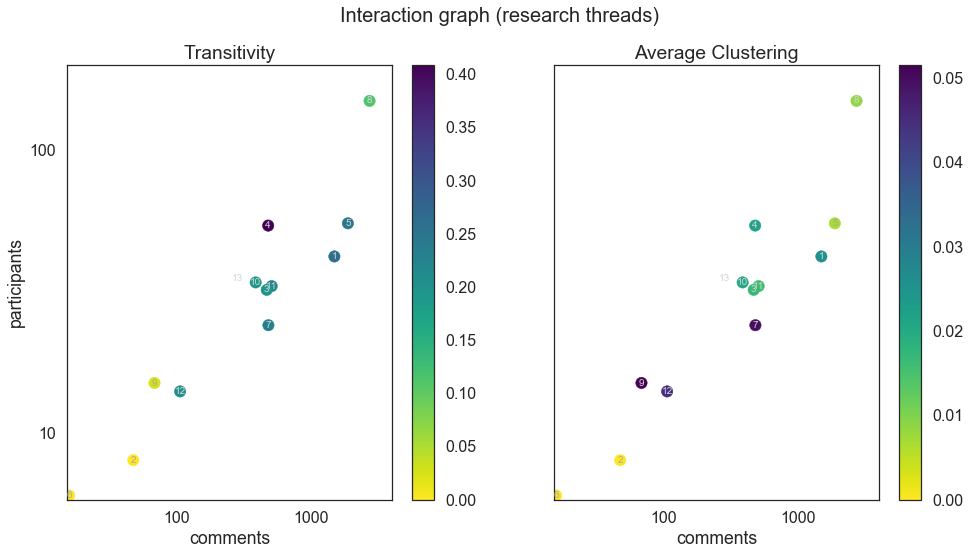

In [53]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

COMPARE3.plot(kind="scatter", x="comments", y="participants", c="transitivity", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[0])
COMPARE3.plot(kind="scatter", x="comments", y="participants", c="cluster_avg", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[1])

fig.suptitle('Interaction graph (research threads)', fontsize=20)
axes[1].get_yaxis().set_visible(False)
axes[0].set_title('Transitivity')
axes[1].set_title('Average Clustering')
fig.get_axes()[2].set_ylabel('')
fig.get_axes()[3].set_ylabel('')
for i in range(2):
    axes[i].set_ylim([0, 200]);
    axes[i].set_xlim([0, 4000]);
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    axes[i].yaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    for label, coords in COMPARE3.iterrows():
        if i == 0 and coords['transitivity'] < 0.06:
            color = "darkgray"
        elif i == 1 and coords['cluster_avg'] < 0.008:
            color = "darkgray"
        else:
            color = "lightgray"
        axes[i].text(coords['comments'], coords['participants'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color=color)

## Profile of participants (number of comments)

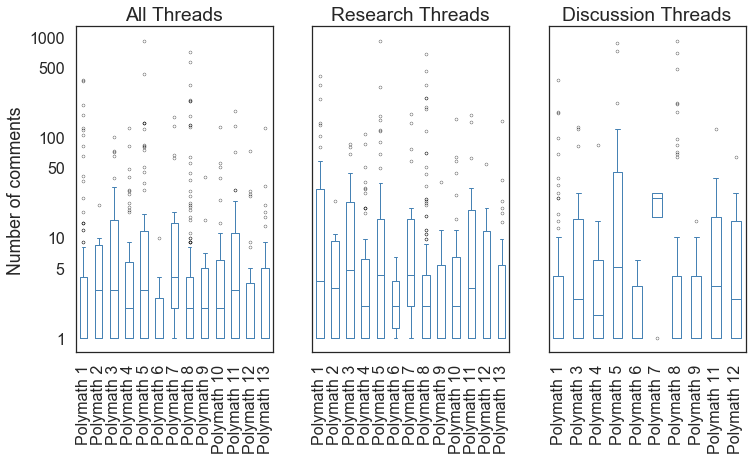

In [54]:
plot_comments_boxplot(PM_FRAME)

### Comparing participants across projects

**TODO:** find uniform way across methods to include or exclude weight for measures.

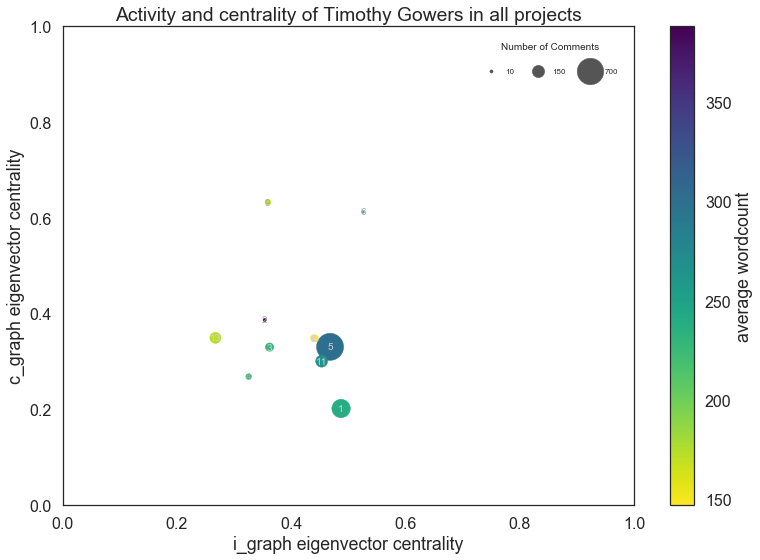

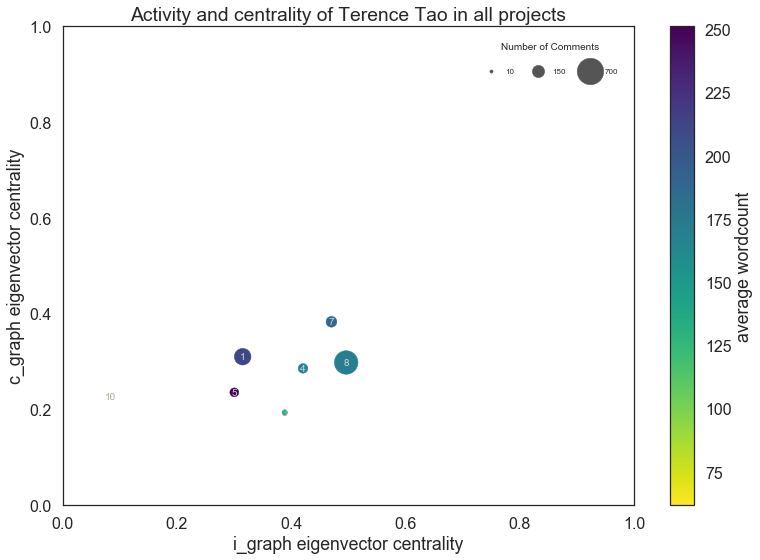

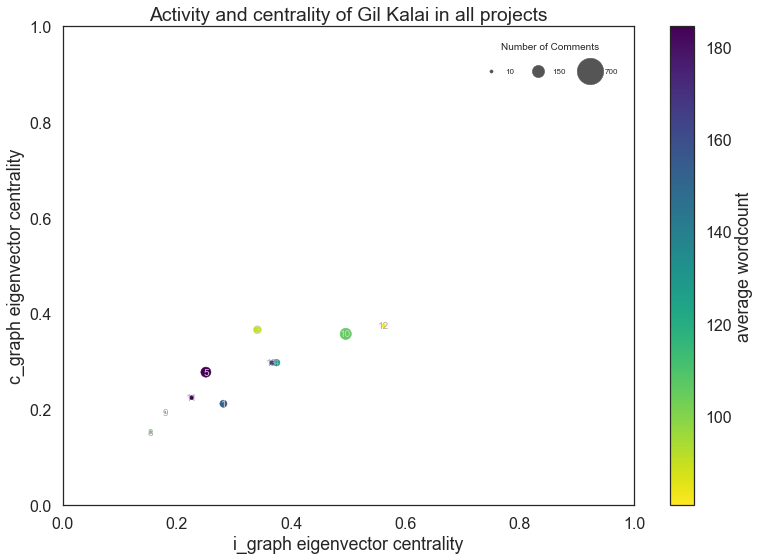

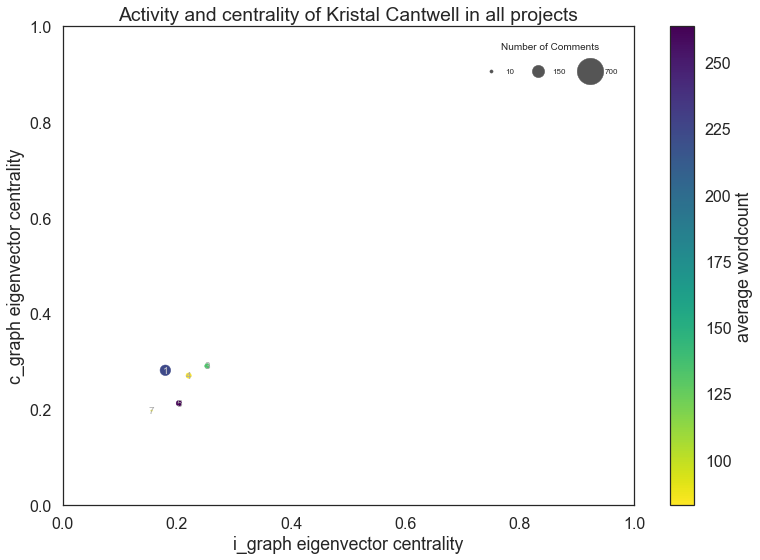

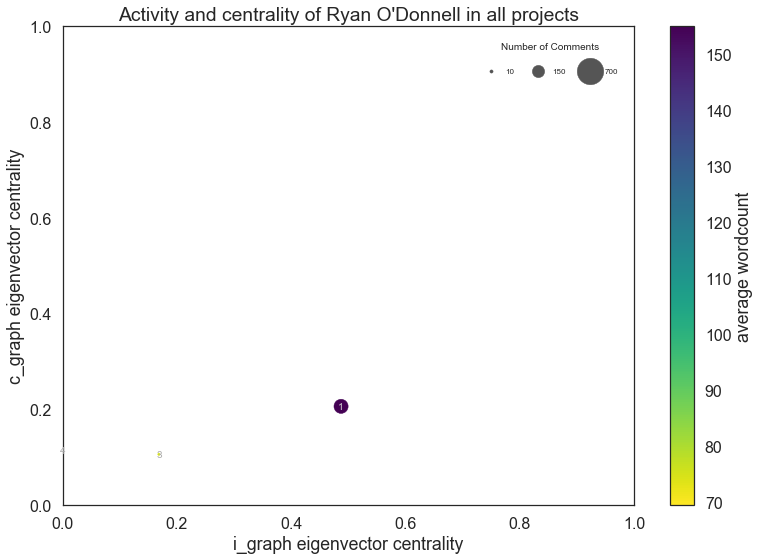

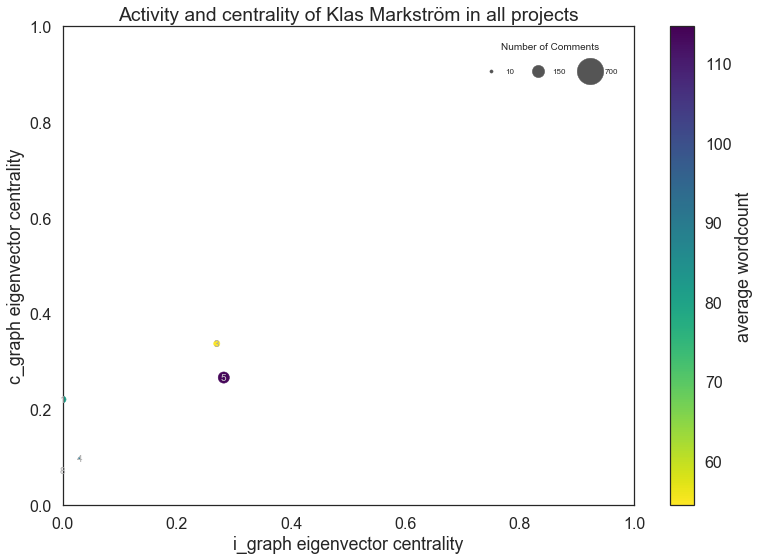

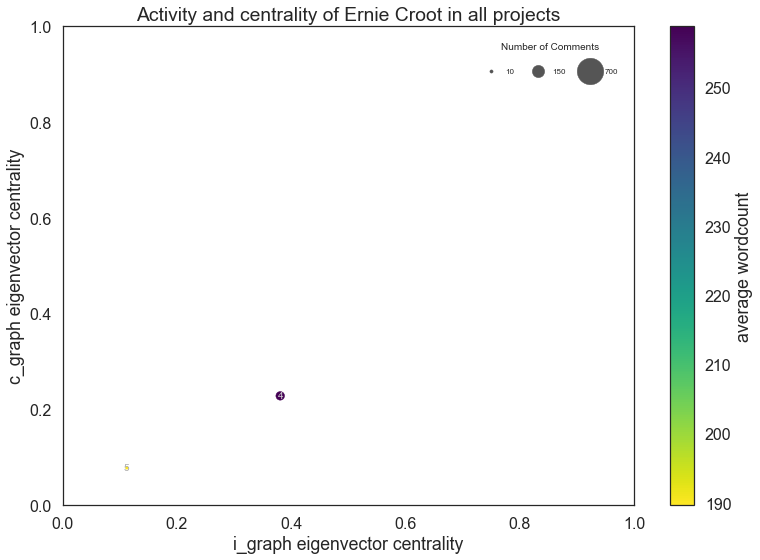

In [55]:
# ToDo: check the influence of taking into account weight (which is correlated with other variables)
for participant in ["Timothy Gowers", "Terence Tao", "Gil Kalai", "Kristal Cantwell", "Ryan O'Donnell", "Klas Markström", "Ernie Croot"]:
    try:
        scatter_author_profile(PM_FRAME, participant, thread_type="research threads")
    except:
        print("Failed at ", participant)

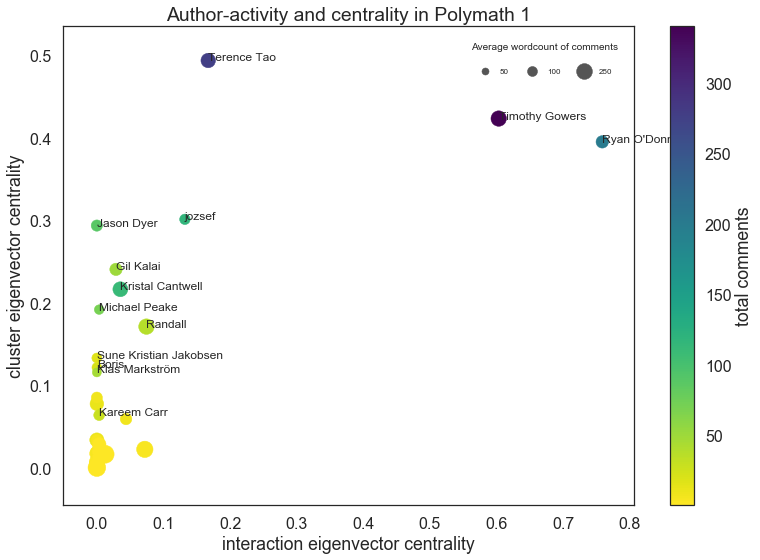

In [56]:
plot_scatter_authors(PM_FRAME, "Polymath 1", thread_type="research threads", measure="eigenvector centrality", weight={'interaction':'weight', 'cluster':'weight'})

### Looking for periods of intense interaction

In [57]:
pm4_focus = {"project": "Polymath 4", "thread_type": "research threads", "stage": 3}

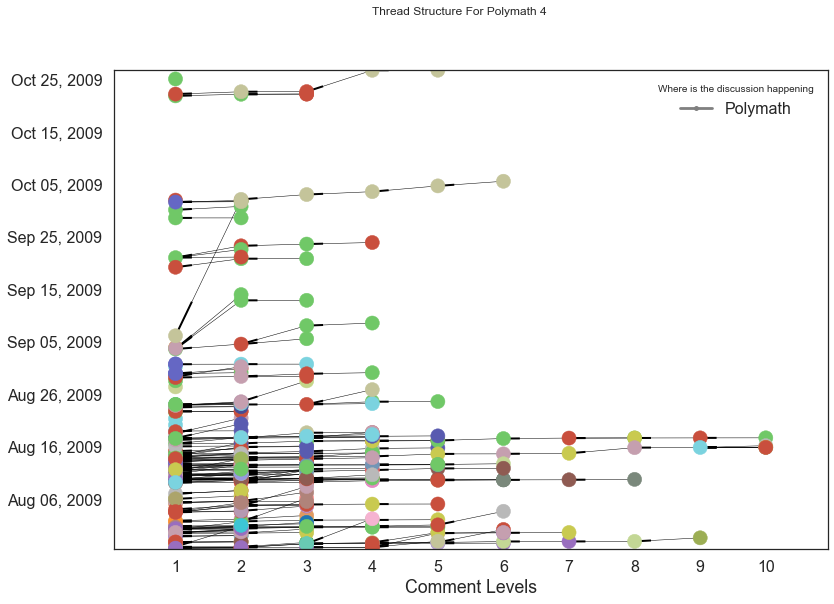

In [63]:
plot_discussion_tree(PM_FRAME, **pm4_focus)

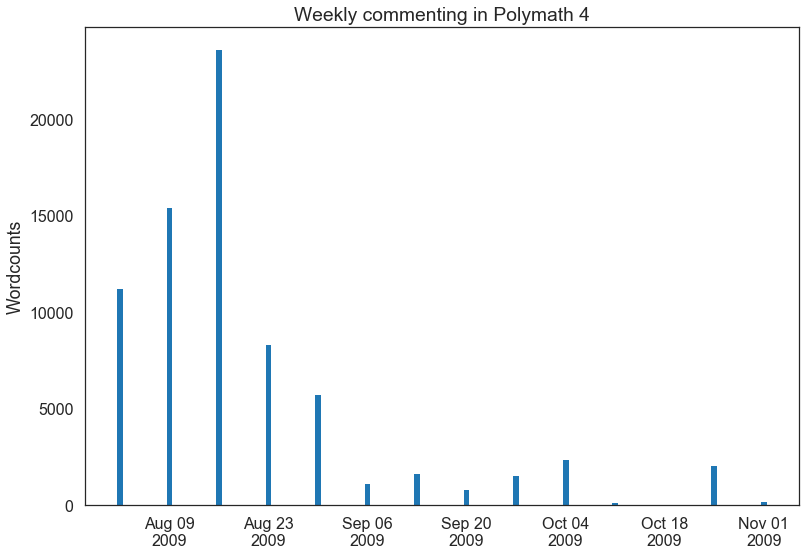

In [64]:
plot_growth_size(PM_FRAME, **pm4_focus)

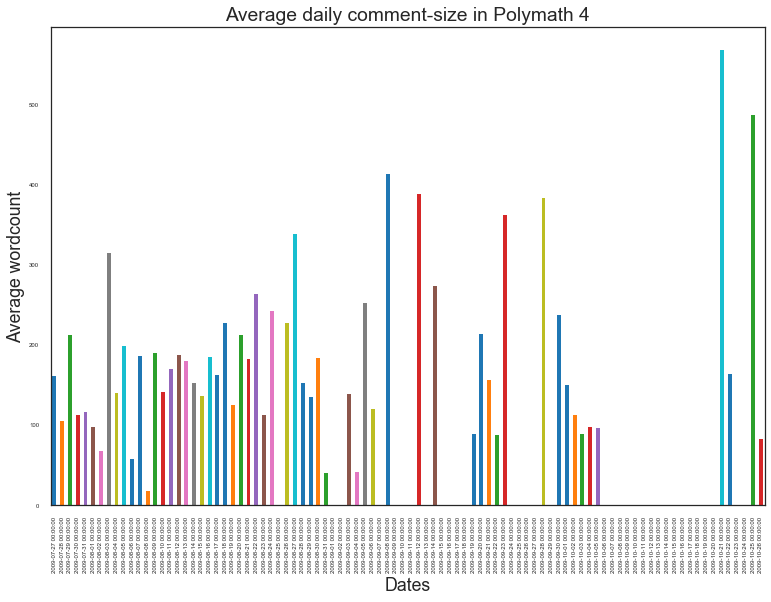

In [65]:
plot_comment_sizes(PM_FRAME, **pm4_focus)

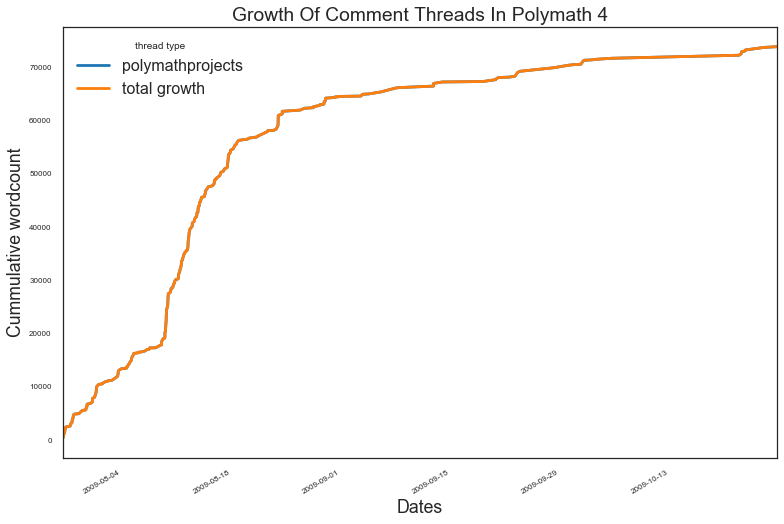

In [66]:
plot_growth(PM_FRAME, **pm4_focus, fontsize=8)

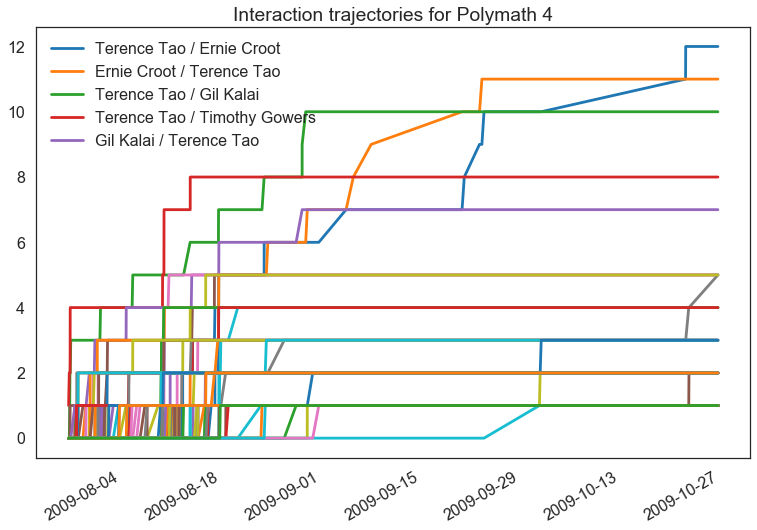

In [67]:
plot_interaction_trajectories(PM_FRAME, **pm4_focus)

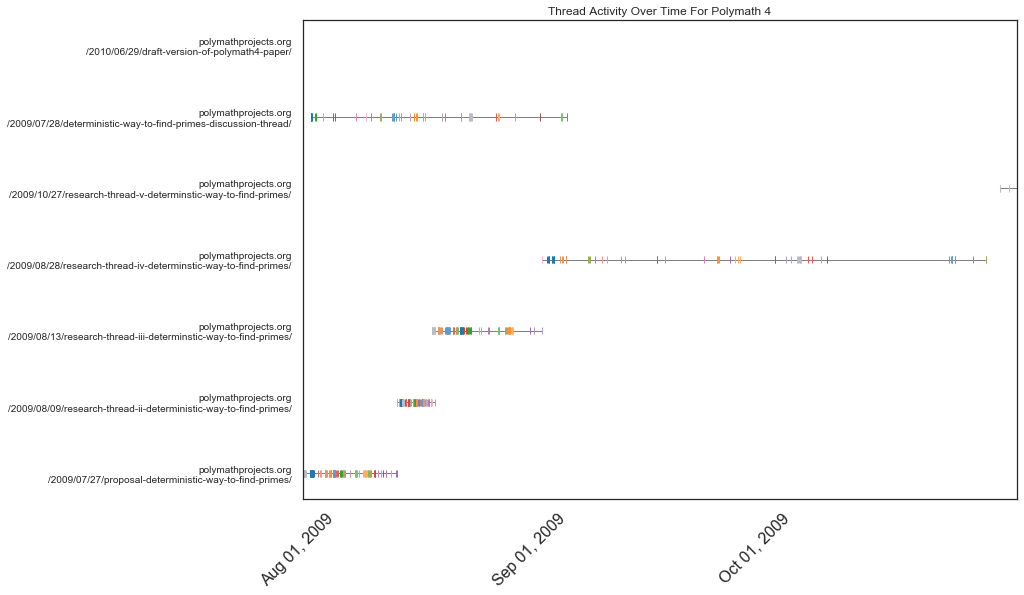

In [68]:
plot_activity_thread(PM_FRAME, project="Polymath 4", last="2009-10-31")

## Comparing PM4 and PM5

We start by looking at the structure of (an intial fragment) of the threads. We focus on research-threads (because PM4 does not start with discussion-threads); specifically the first 4 threads of PM4 (accounting for 443 comments from 47 participants) and the first 5 research-threads of PM5 (accounting for 413 comments from 22).

**This focus has to be better motivated. The initial idea is that these two chunks are comparable w.r.t. the number of comments involved. The number of participants is, however, substantially different.**

In [69]:
PM4_FOCUS={'project': "Polymath 4", 'thread_type': "research threads", 'stage':3}
PM5_FOCUS={'project': "Polymath 5", 'thread_type': "research threads", 'stage':9}

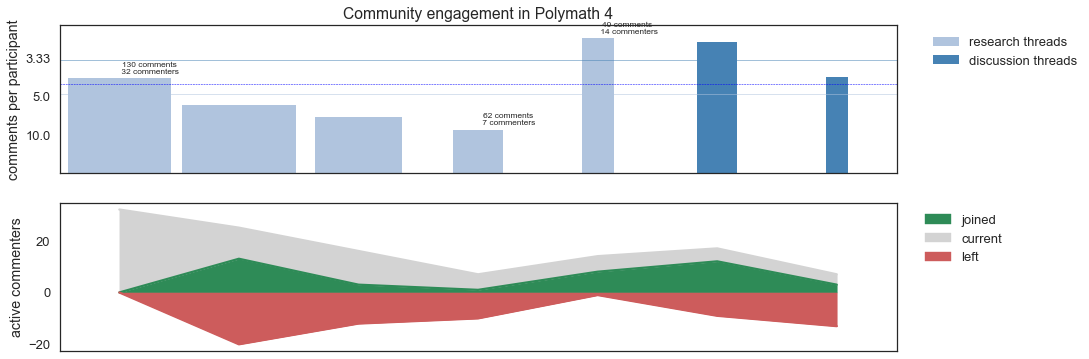

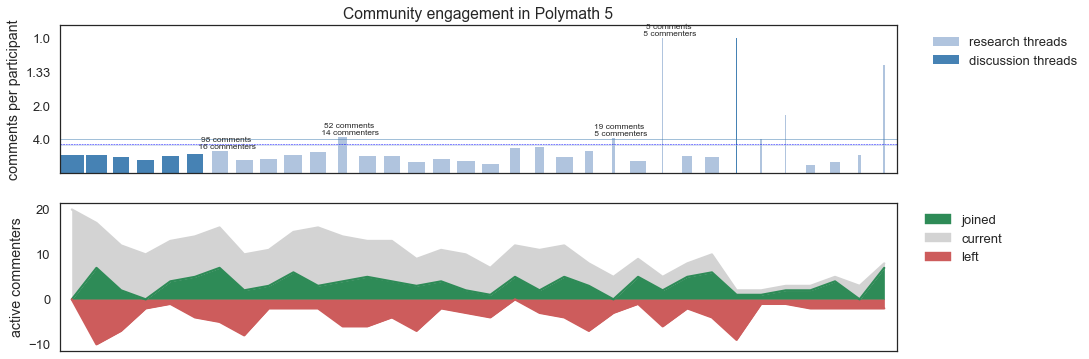

In [70]:
plot_thread_evolution(PM_FRAME, "Polymath 4", compress=150, sel=[1, 4, 5])
plot_thread_evolution(PM_FRAME, "Polymath 5", compress=150, sel=[7, 12, 23, 25])

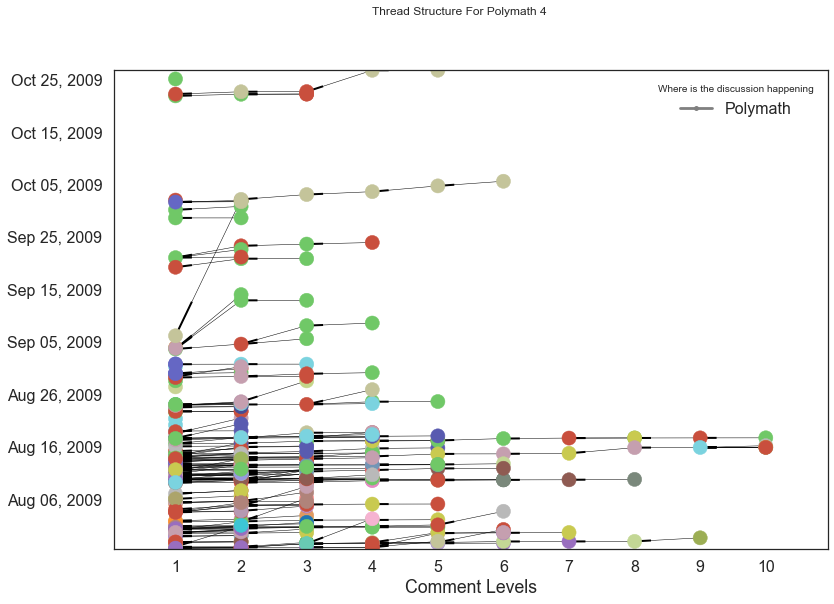

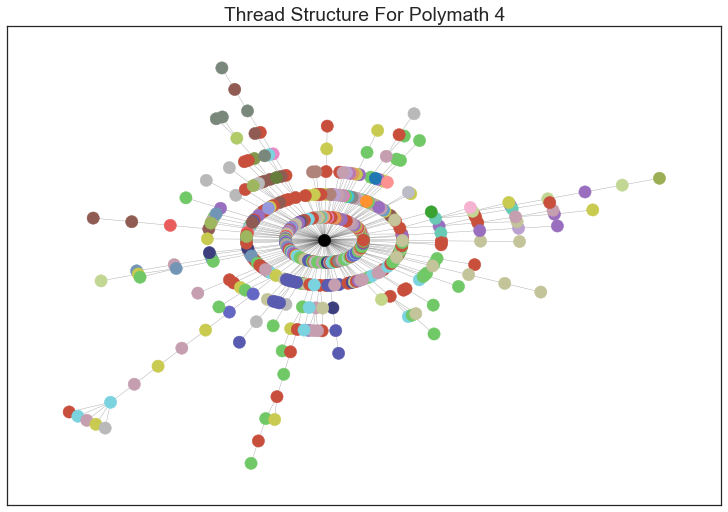

In [73]:
plot_discussion_tree(PM_FRAME, **PM4_FOCUS)
plot_discussion_tree_radial(PM_FRAME, **PM4_FOCUS)

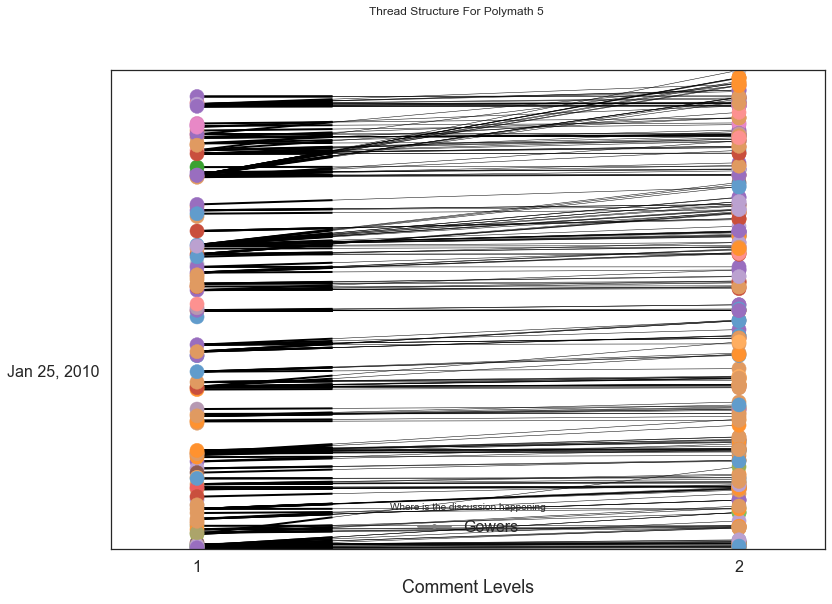

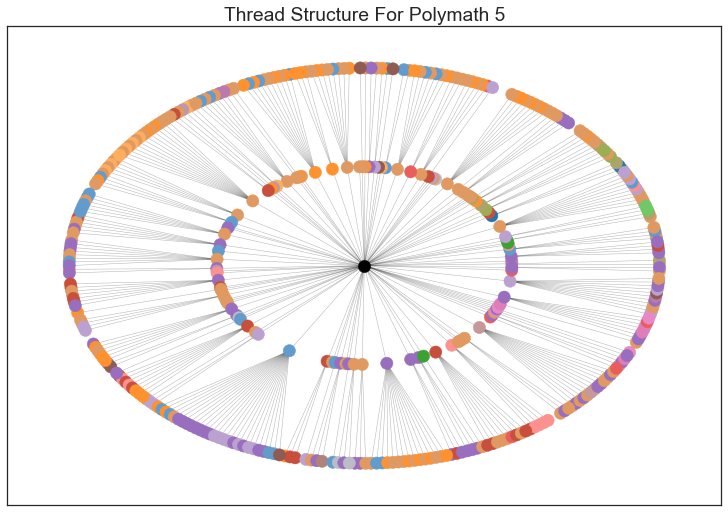

In [74]:
plot_discussion_tree(PM_FRAME, **PM5_FOCUS)
plot_discussion_tree_radial(PM_FRAME, **PM5_FOCUS)

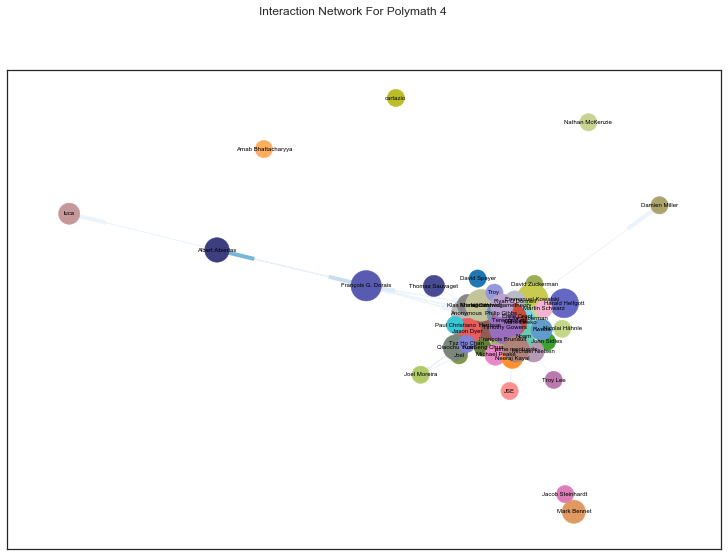

In [194]:
draw_network(PM_FRAME, **PM4_FOCUS)

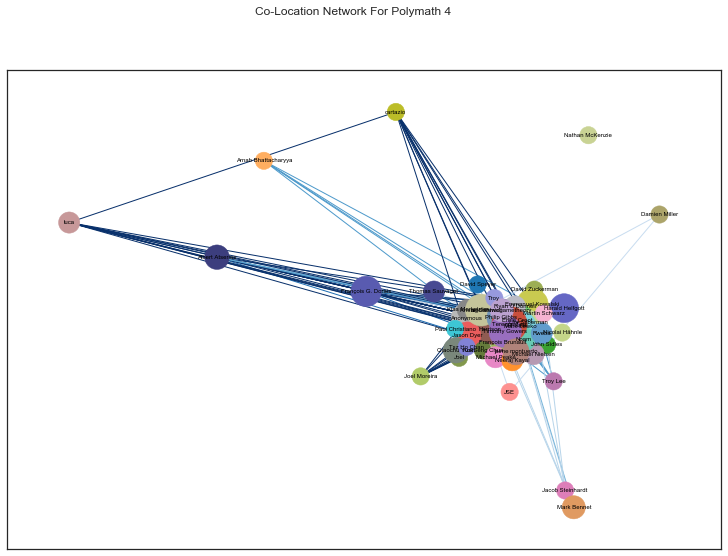

In [193]:
draw_network(PM_FRAME, **PM4_FOCUS, graph_type="cluster")

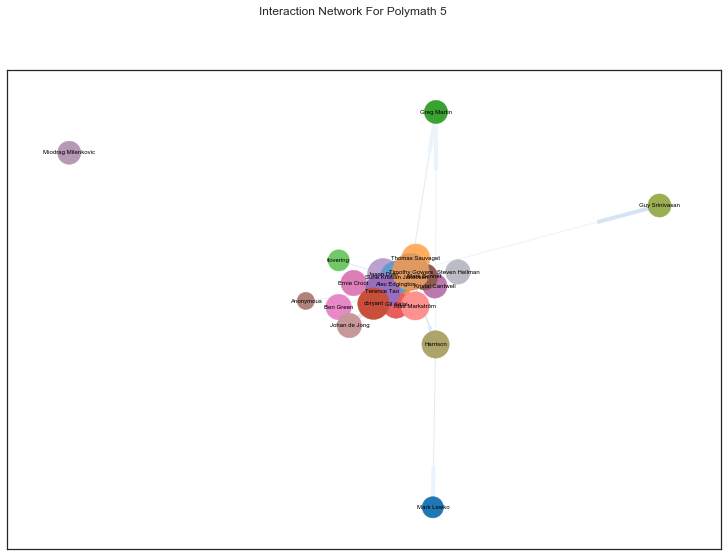

In [77]:
draw_network(PM_FRAME, **PM5_FOCUS)

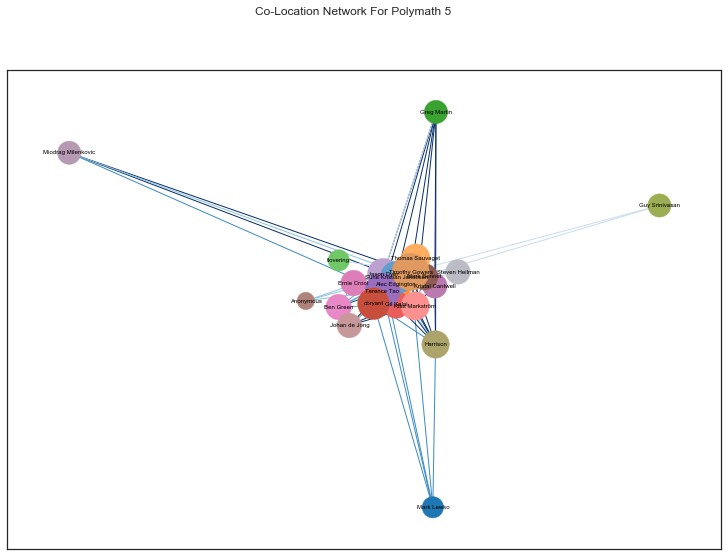

In [78]:
draw_network(PM_FRAME, **PM5_FOCUS, graph_type="cluster")

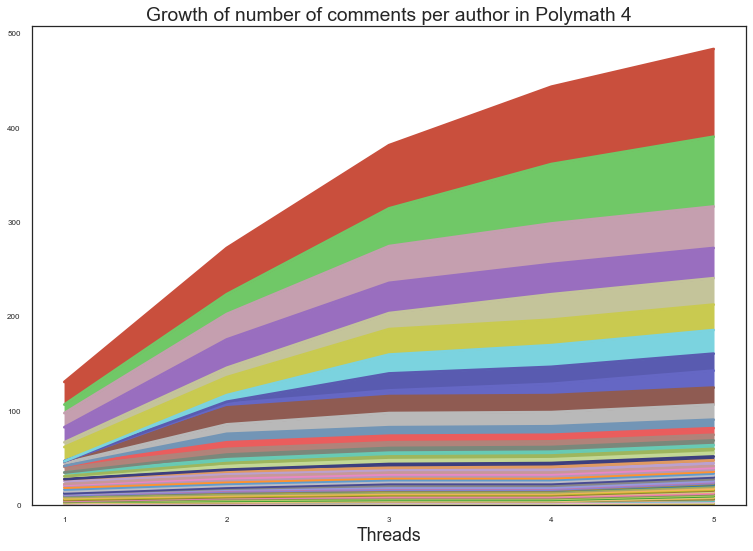

In [79]:
plot_activity_area(PM_FRAME, project="Polymath 4", thread_type="research threads")

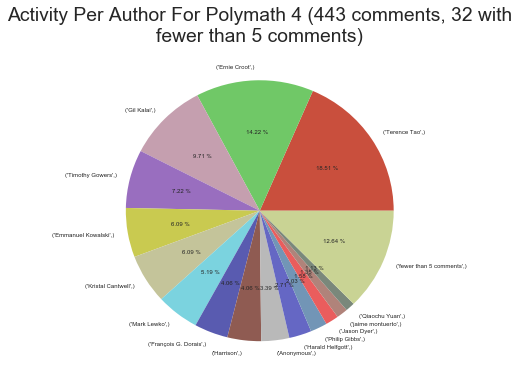

In [80]:
plot_activity_pie(PM_FRAME, **PM4_FOCUS)

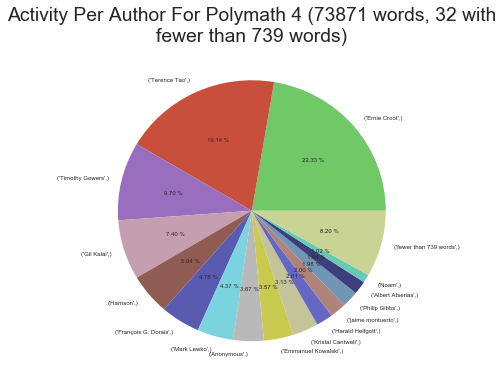

In [81]:
plot_activity_pie(PM_FRAME, **PM4_FOCUS, what="word counts")

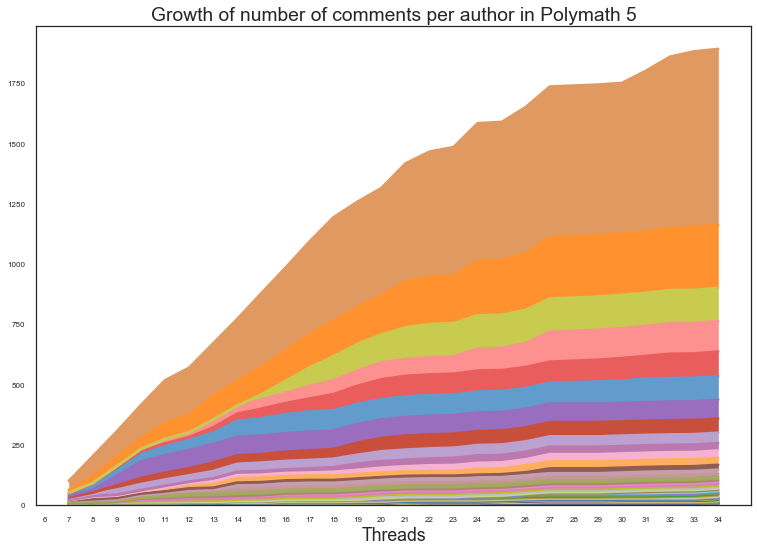

In [82]:
plot_activity_area(PM_FRAME, project="Polymath 5", thread_type="research threads")

Note in the above plot that the contribution of Terence Tao (apparently) comes to a halt after thread 10.

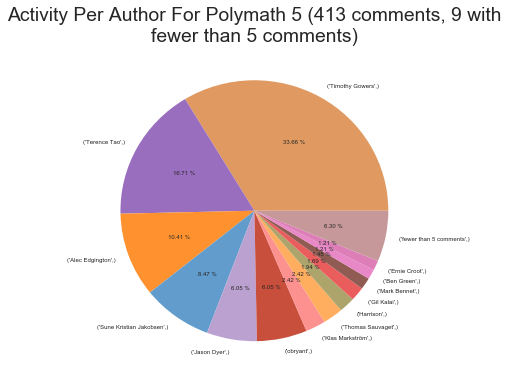

In [83]:
plot_activity_pie(PM_FRAME, **PM5_FOCUS)

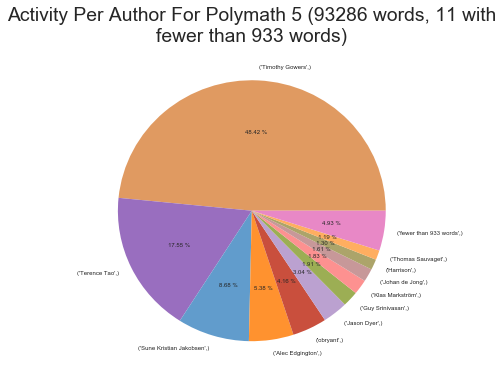

In [84]:
plot_activity_pie(PM_FRAME, **PM5_FOCUS, what="word counts")

The series of plots below show that Polymath 4 has 11 participants with Eigenvector Centrality ≥ 0.2, whereas Polymath 5 only has 7 participants with Eigenvector Centrality ≥ 0.2.

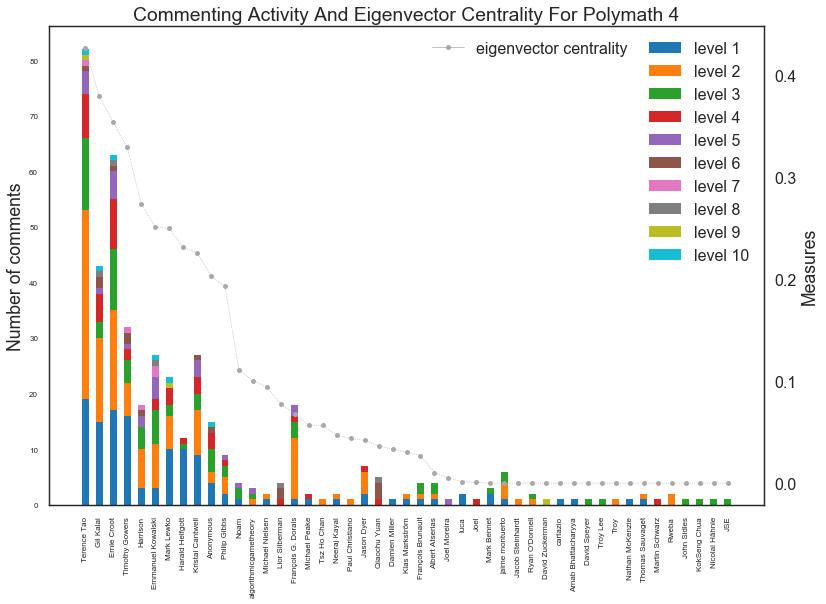

In [85]:
plot_activity_degree(PM_FRAME, **PM4_FOCUS,
                     measures=["eigenvector centrality"],# "closeness centrality"],
                     delete_on=None, thresh=None, fontsize=8)

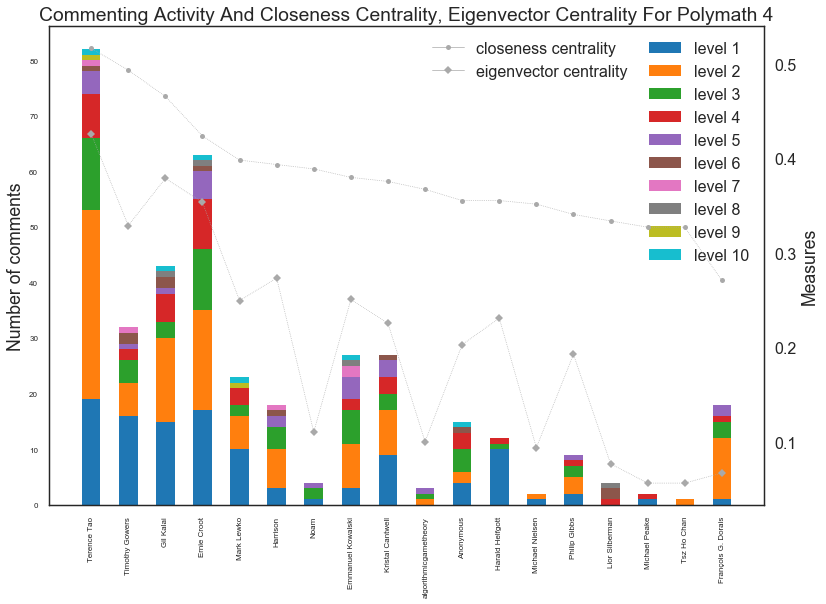

In [86]:
plot_activity_degree(PM_FRAME, **PM4_FOCUS,
                     measures=["closeness centrality", "eigenvector centrality"],
                     delete_on=1, thresh=.05, fontsize=8)

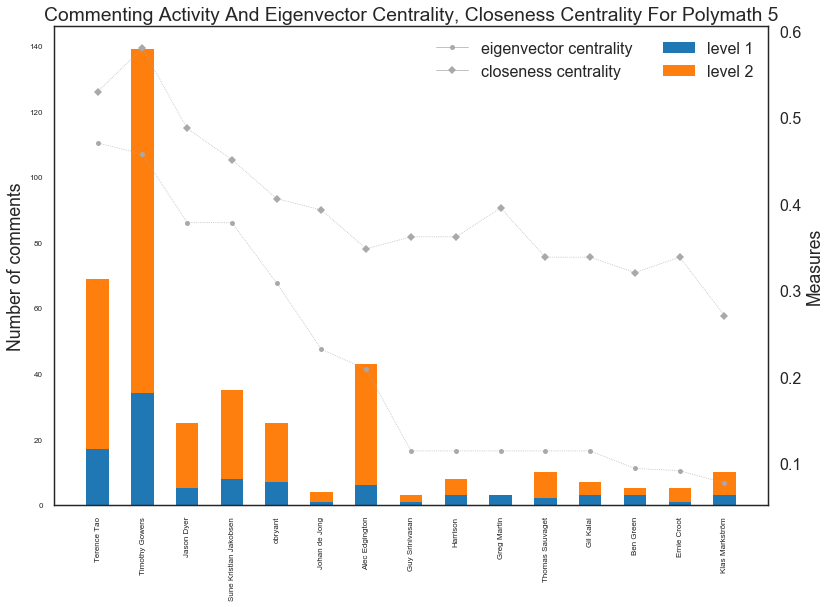

In [87]:
plot_activity_degree(PM_FRAME, **PM5_FOCUS,
                     measures=["eigenvector centrality", "closeness centrality"],
                     delete_on=0, thresh=.05, fontsize=8)

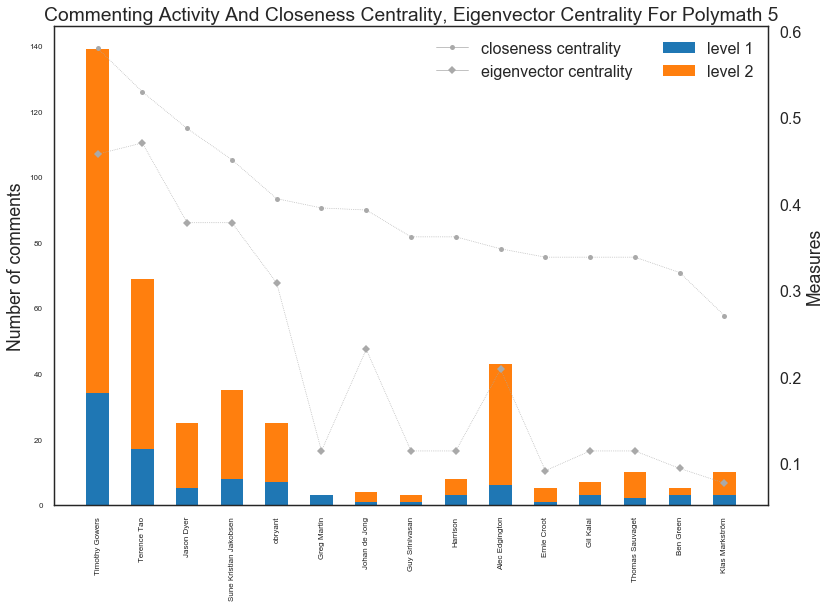

In [88]:
plot_activity_degree(PM_FRAME, **PM5_FOCUS,
                     measures=["closeness centrality", "eigenvector centrality"],
                     delete_on=1, thresh=.05, fontsize=8)

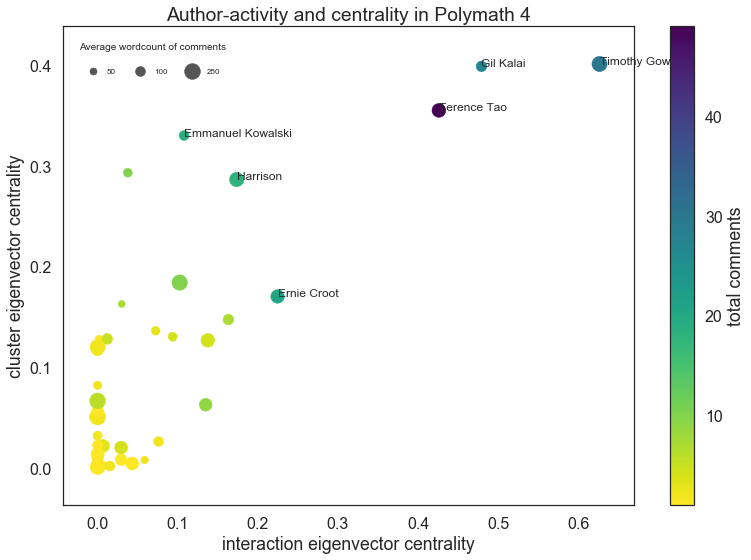

In [89]:
plot_scatter_authors(PM_FRAME, "Polymath 4", thread_tye= "research threads", measure="eigenvector centrality",
                     weight={'interaction': 'weight', 'cluster': 'weight'}, stage=1)

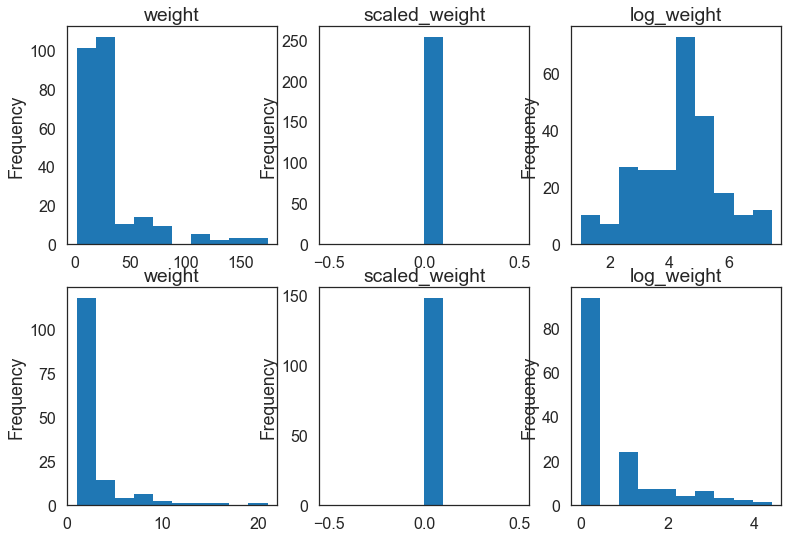

In [199]:
a_c_graph = get_project_at(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1).network.c_graph.copy()

a_i_graph = get_project_at(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1).network.i_graph.copy()


fig, axes = plt.subplots(2, 3)
for i, graph in enumerate([a_c_graph, a_i_graph]):
    for j, weight in enumerate(["weight", "scaled_weight", "log_weight"]):
        try:
            Series([data[weight] for _, _, data in graph.edges(data=True)]).plot(kind="hist", ax=axes[i, j])
            axes[i,j].set_title(weight)
        except:
            print("passed")
            pass

In [200]:
plot_edge_weight_dist?

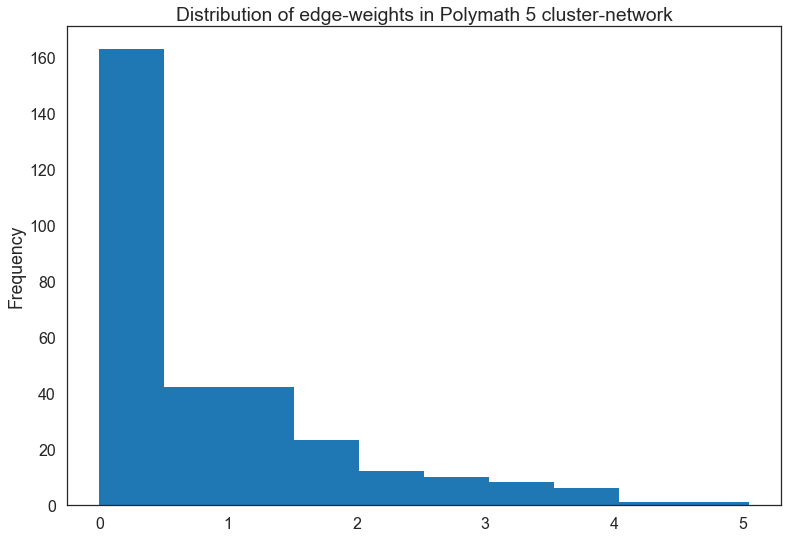

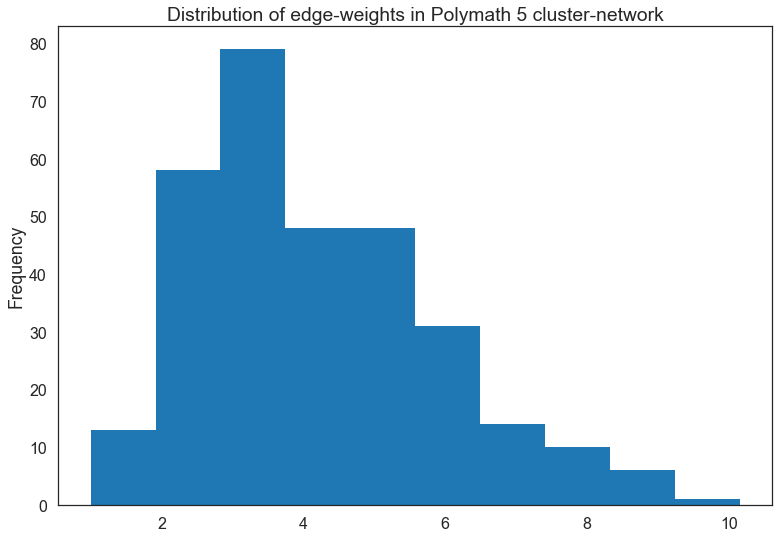

In [91]:
plot_edge_weight_dist(PM_FRAME, "Polymath 5", g_type="cluster", weight="simple_weight", kind='hist', transform=np.log)
plot_edge_weight_dist(PM_FRAME, "Polymath 5", g_type="cluster", weight="weight", kind='hist', transform=np.log2)

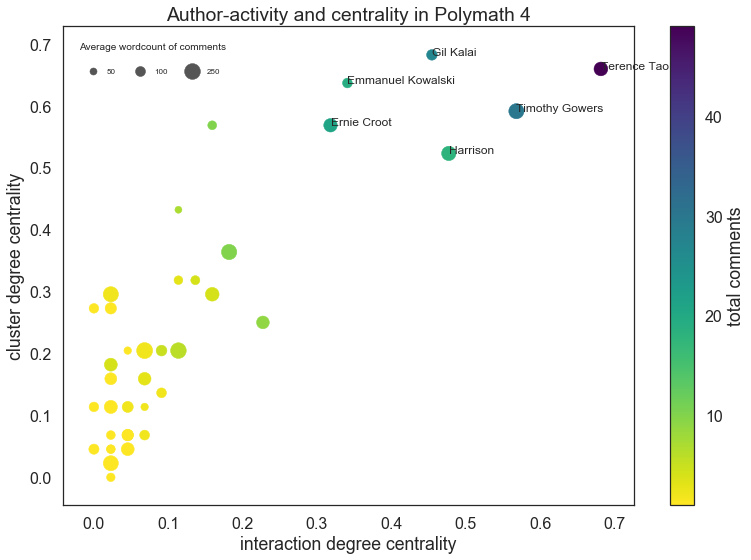

In [309]:
plot_scatter_authors(PM_FRAME, "Polymath 4", thread_tye= "research threads", measure="degree centrality",
                     weight={'interaction': 'weight', 'cluster': 'simple_weight'}, stage=1)

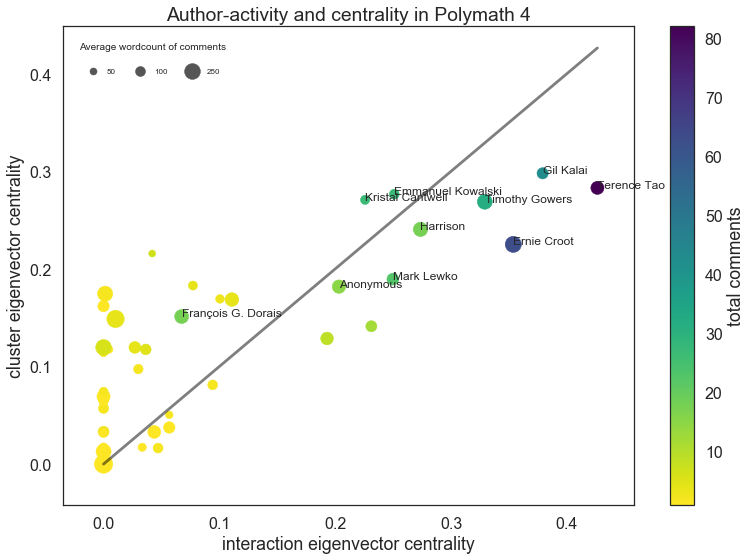

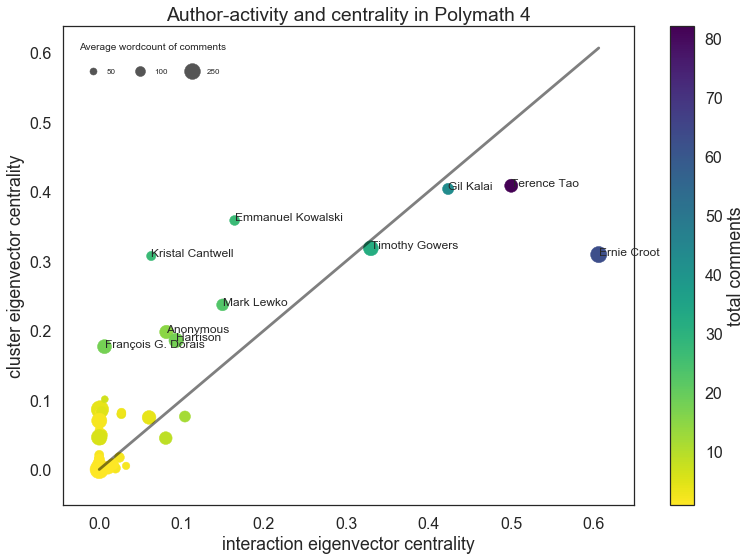

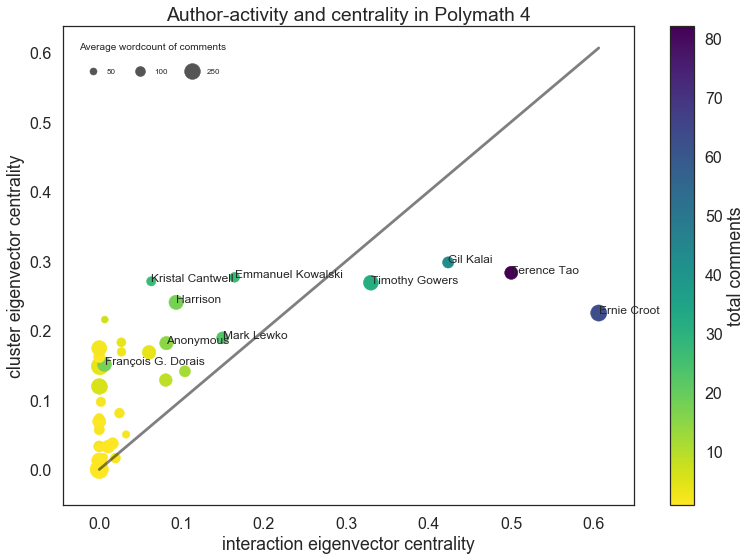

In [317]:
plot_scatter_authors(PM_FRAME, **PM4_FOCUS, measure="eigenvector centrality", weight={'interaction': None, 'cluster': None}, add_diagonal=True)
plot_scatter_authors(PM_FRAME, **PM4_FOCUS, measure="eigenvector centrality", weight={'interaction': 'weight', 'cluster': 'weight'}, add_diagonal=True)
plot_scatter_authors(PM_FRAME, **PM4_FOCUS, measure="eigenvector centrality", weight={'interaction': 'weight', 'cluster': 'author_weight'}, add_diagonal=True)

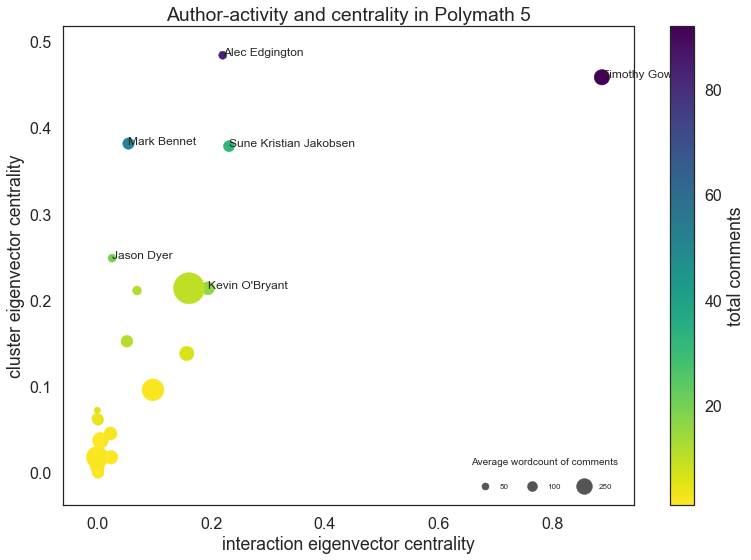

In [94]:
plot_scatter_authors(PM_FRAME, "Polymath 5", thread_tye= "research threads", measure="eigenvector centrality",
                     weight={'interaction': 'weight', 'cluster': 'weight'}, stage=2)

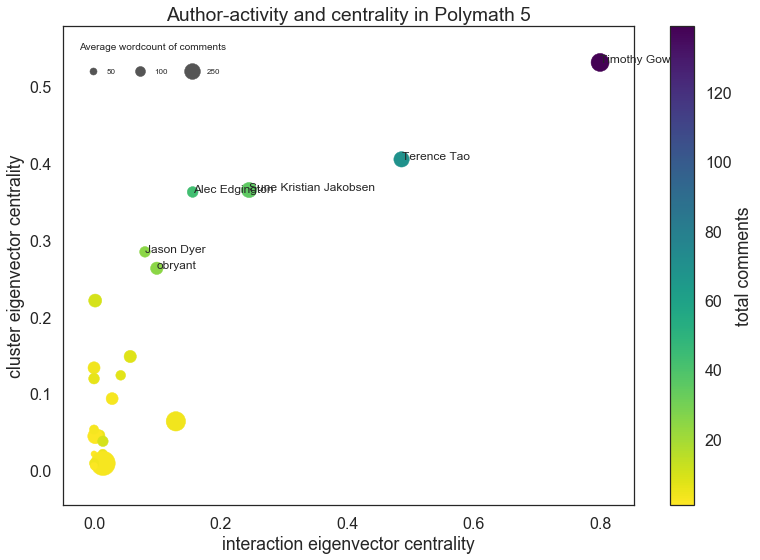

In [95]:
plot_scatter_authors(PM_FRAME, **PM5_FOCUS, measure="eigenvector centrality", weight={'interaction': 'weight', 'cluster': 'weight'})

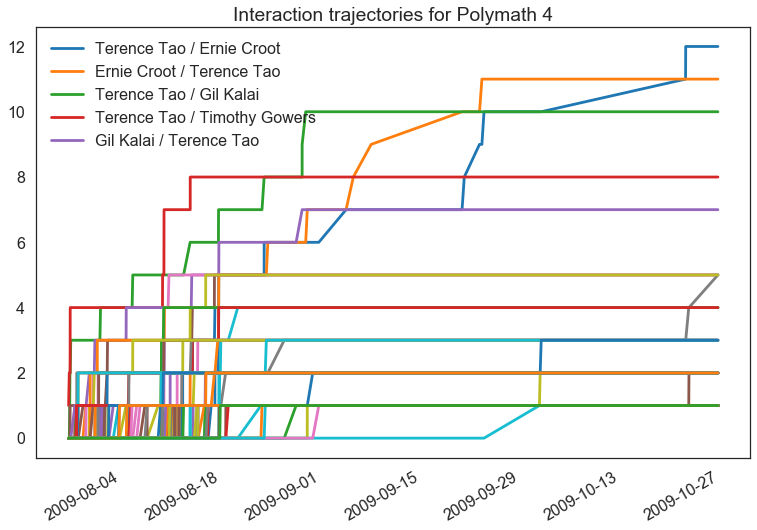

In [96]:
plot_interaction_trajectories(PM_FRAME, **PM4_FOCUS)

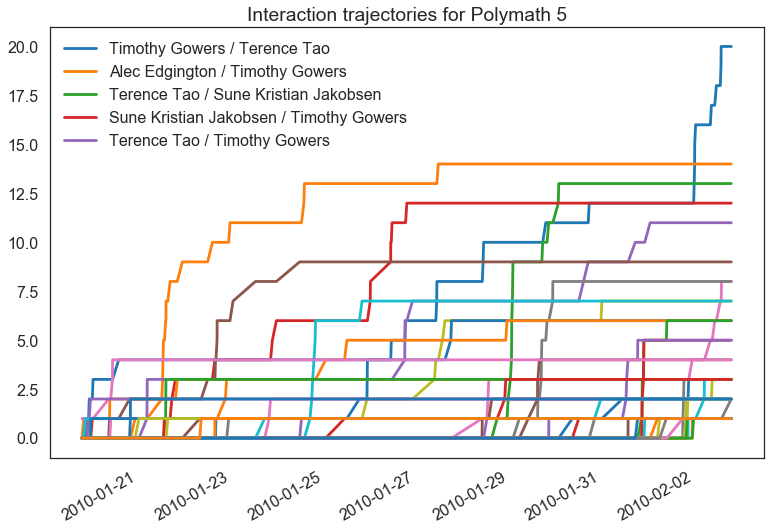

In [97]:
plot_interaction_trajectories(PM_FRAME, **PM5_FOCUS)

Give filename: distances


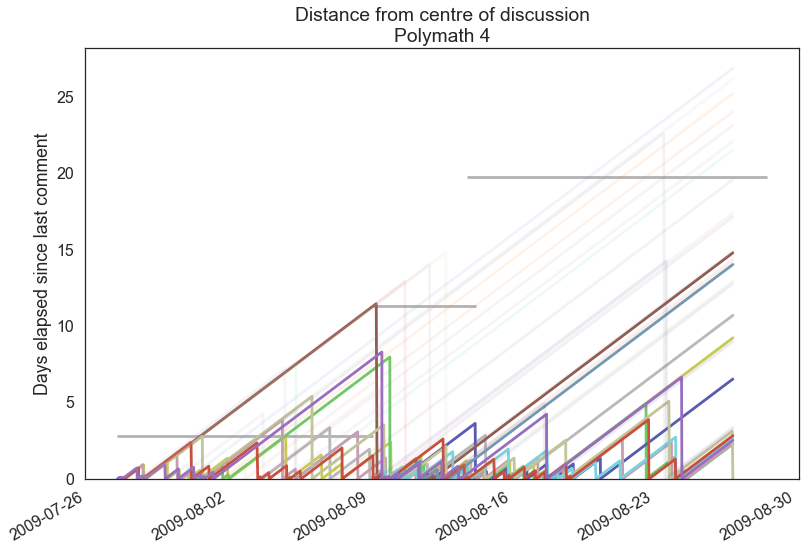

In [98]:
plot_distance_from_centre(PM_FRAME, "Polymath 4", thread_type="research threads", stage=2, show_threads=True, show=False)

Give filename: boxplot


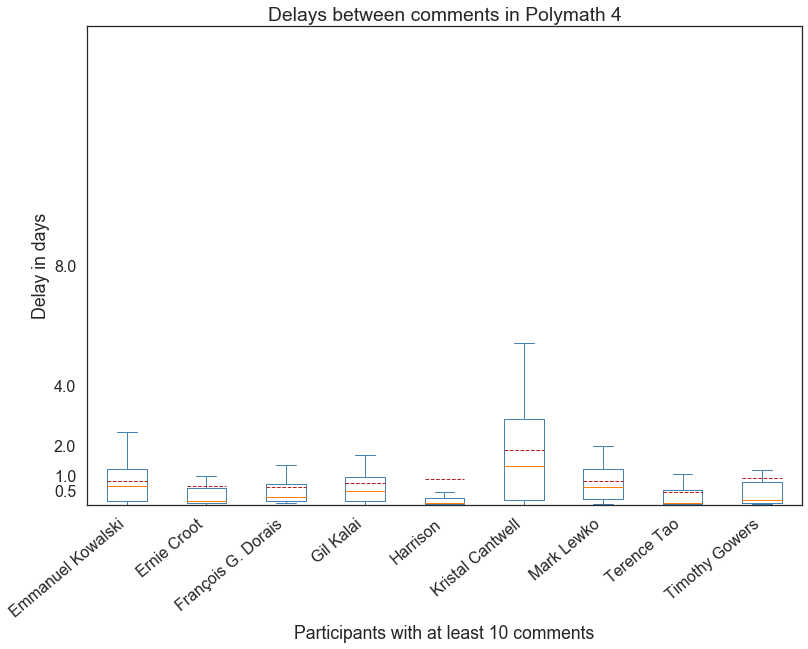

In [99]:
plot_delays_boxplot(PM_FRAME, "Polymath 4", thread_type="research threads", stage=2, show_threads=True, show=False)

Give filename: crows


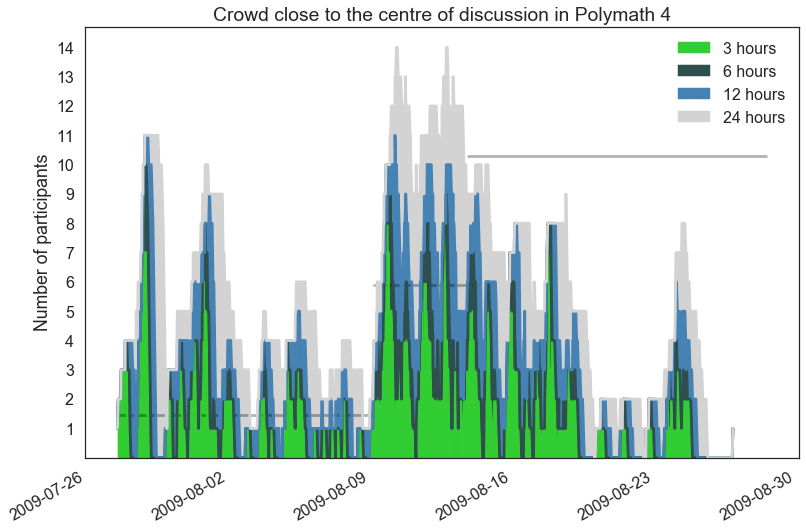

In [100]:
plot_centre_crowd(PM_FRAME, "Polymath 4", thread_type="research threads", stage=2, show_threads=True, show=False)

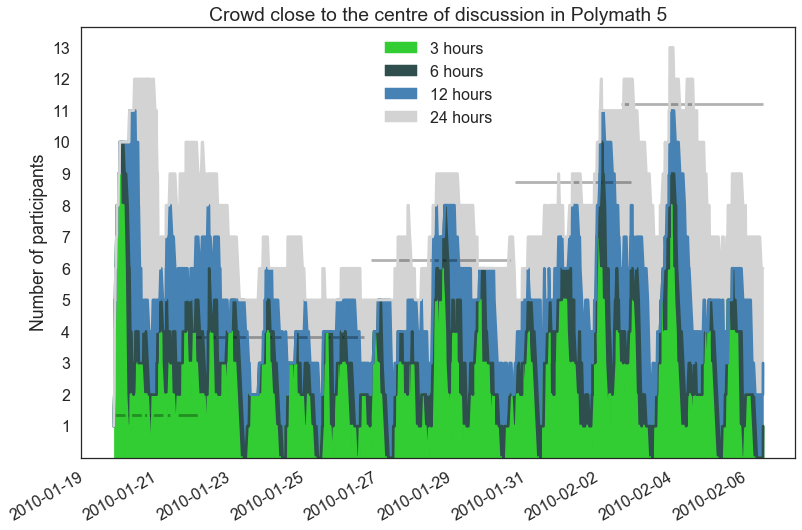

In [101]:
plot_centre_crowd(PM_FRAME, "Polymath 5", thread_type="research threads", stage=10, show_threads=True)

## A quick experiment with edge_swap

In [102]:
pm4_network = get_project_at(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1).network

In [103]:
#pm4_network.draw_graph(graph_type='cluster')

In [104]:
#pm4_network.c_graph

In [105]:
#pm4_swapped = nx.double_edge_swap(pm4_network.c_graph.copy(), nswap=20, max_tries=200)

In [106]:
#nx.draw_networkx(pm4_swapped)

## Experimenting with episode-based heatmaps

In [107]:
pm4_eps = get_project_at(
    PM_FRAME, "Polymath 4",
    thread_type="research threads", stage=0).network.author_frame.episodes

In [108]:
pm4_eps.iloc[0]

{('proposal-deterministic-way-to-find-primes', 8, 6, 1),
 ('proposal-deterministic-way-to-find-primes', 14, 2, 1),
 ('proposal-deterministic-way-to-find-primes', 16, 1, 1)}

In [109]:
all_eps = list(set().union(*pm4_eps.values))

In [201]:
# find time-frame of each episode
index = []
data_f = []
for node, data in get_project_at(
        PM_FRAME, "Polymath 4", thread_type="research threads", stage=-1)['mthread (accumulated)'].graph.nodes(data=True):
    index.append(node)
    data_f.append([data['com_author'],
                   data['com_timestamp'],
                   data['com_thread'],
                   data['cluster_id']])

episode_data = DataFrame(data_f, index=index, columns=['author', 'timestamp', 'thread', 'cluster'])
episode_data.head()

author           timestamp  \
comment-525  François G. Dorais 2009-08-14 19:56:00   
comment-325        Qiaochu Yuan 2009-08-09 18:24:00   
comment-318    Kristal Cantwell 2009-08-09 17:03:00   
comment-471          Mark Lewko 2009-08-13 02:31:00   
comment-327            Harrison 2009-08-09 18:29:00   

                                                        thread     cluster  
comment-525  (http, polymathprojects.org, /2009/08/13/resea...  (3, 14, 3)  
comment-325  (http, polymathprojects.org, /2009/08/09/resea...  (0, 31, 5)  
comment-318  (http, polymathprojects.org, /2009/08/09/resea...  (0, 31, 3)  
comment-471  (http, polymathprojects.org, /2009/08/09/resea...  (15, 3, 1)  
comment-327  (http, polymathprojects.org, /2009/08/09/resea...  (0, 31, 7)

In [113]:
episode_durations = episode_data.groupby(['thread', 'cluster'])['timestamp'].max() - episode_data.groupby(['thread', 'cluster'])['timestamp'].min()

In [114]:
episode_durations.unstack()

cluster                                            (0, 10, 2) (0, 10, 3)  \
thread                                                                     
(http, polymathprojects.org, /2009/07/27/propos...        NaT        NaT   
(http, polymathprojects.org, /2009/08/09/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/08/13/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/08/28/resear...   17:48:00   20:52:00   
(http, polymathprojects.org, /2009/10/27/resear...        NaT        NaT   

cluster                                            (0, 14, 1)      (0, 14, 3)  \
thread                                                                          
(http, polymathprojects.org, /2009/07/27/propos...        NaT             NaT   
(http, polymathprojects.org, /2009/08/09/resear...        NaT             NaT   
(http, polymathprojects.org, /2009/08/13/resear...        NaT             NaT   
(http, polymathprojects.org, /2009/08/28/resear...        NaT             NaT   
(http, polymathprojects.org, /2009/10/27/resear...     0 days 8 days 03:11:00   

cluster                                                 (0, 14, 5) (0, 19, 1)  \
thread                                                                          
(http, polymathprojects.org, /2009/07/27/propos...             NaT        NaT   
(http, polymathprojects.org, /2009/08/09/resear...             NaT        NaT   
(http, polymathprojects.org, /2009/08/13/resear...             NaT   01:01:00   
(http, polymathprojects.org, /2009/08/28/resear...             NaT        NaT   
(http, polymathprojects.org, /2009/10/27/resear... 7 days 18:03:00        NaT   

cluster                                            (0, 19, 2) (0, 19, 3)  \
thread                                                                     
(http, polymathprojects.org, /2009/07/27/propos...        NaT        NaT   
(http, polymathprojects.org, /2009/08/09/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/08/13/resear...   09:27:00   06:37:00   
(http, polymathprojects.org, /2009/08/28/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/10/27/resear...        NaT        NaT   

cluster                                            (0, 19, 4) (0, 23, 1)  \
thread                                                                     
(http, polymathprojects.org, /2009/07/27/propos...        NaT   11:35:00   
(http, polymathprojects.org, /2009/08/09/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/08/13/resear...   03:18:00        NaT   
(http, polymathprojects.org, /2009/08/28/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/10/27/resear...        NaT        NaT   

cluster                                               ...     (16, 2, 1)  \
thread                                                ...                  
(http, polymathprojects.org, /2009/07/27/propos...    ...            NaT   
(http, polymathprojects.org, /2009/08/09/resear...    ...       01:20:00   
(http, polymathprojects.org, /2009/08/13/resear...    ...            NaT   
(http, polymathprojects.org, /2009/08/28/resear...    ...            NaT   
(http, polymathprojects.org, /2009/10/27/resear...    ...            NaT   

cluster                                            (17, 1, 1) (17, 2, 1)  \
thread                                                                     
(http, polymathprojects.org, /2009/07/27/propos...     0 days        NaT   
(http, polymathprojects.org, /2009/08/09/resear...        NaT   01:33:00   
(http, polymathprojects.org, /2009/08/13/resear...        NaT        NaT   
(http, polymathprojects.org, /2009/08/28/resear...     0 days        NaT   
(http, polymathprojects.org, /2009/10/27/resear...        NaT        NaT   

cluster                                            (18, 1, 1) (18, 2, 1)  \
thread                                                                     
(http, polymathprojects.org, /2009/07/27/propos

In [115]:
from pandas import Timedelta
pm4_ep_matrix = np.array(
            [[episode_durations.loc[episode].total_seconds() if episode in pm4_eps[author] else 0
              for author in pm4_eps.index]
             for episode in all_eps])

KeyError: 'the label [proposal-deterministic-way-to-find-primes] is not in the [index]'

In [ ]:
pm4_ep_matrix_bool = pm4_ep_matrix != 0

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
Z_author = linkage(pm4_ep_matrix_bool.T, method='complete', metric='hamming')

In [ ]:
pm4_author_order = [pm4_eps.index[i] for i in dendrogram(Z_author, color_threshold=20,
                                  no_plot=True)['leaves']]

In [ ]:
pm4_eps_df = DataFrame(pm4_ep_matrix, columns=pm4_eps.index)
pm4_eps_df = pm4_eps_df[pm4_author_order]

In [ ]:
pm4_eps_df

In [ ]:
plot_heatmap(pm4_eps_df, binary=False, title="Episodes in PM4", fontsize=6, figsize=(10,15), log=True)

In [ ]:
plot_discussion_tree_radial(PM_FRAME, "Polymath 4", thread_type="all threads", stage=0)

In [ ]:
plot_discussion_tree(PM_FRAME, "Polymath 4", thread_type="all threads", stage=0)

## Comparing distributions

**To consider:** is there much difference between within-thread and within-project distribution of degree-centrality

Expand this type of approach to episodes as well

In [273]:
all_networks = get_last(PM_FRAME, thread_type="research threads")[0]['research threads', 'network']
all_networks.index = all_networks.index.droplevel(1)
all_networks = all_networks.loc[["Polymath {}".format(i) for i in [1, 3, 4, 5, 8, 11]]]

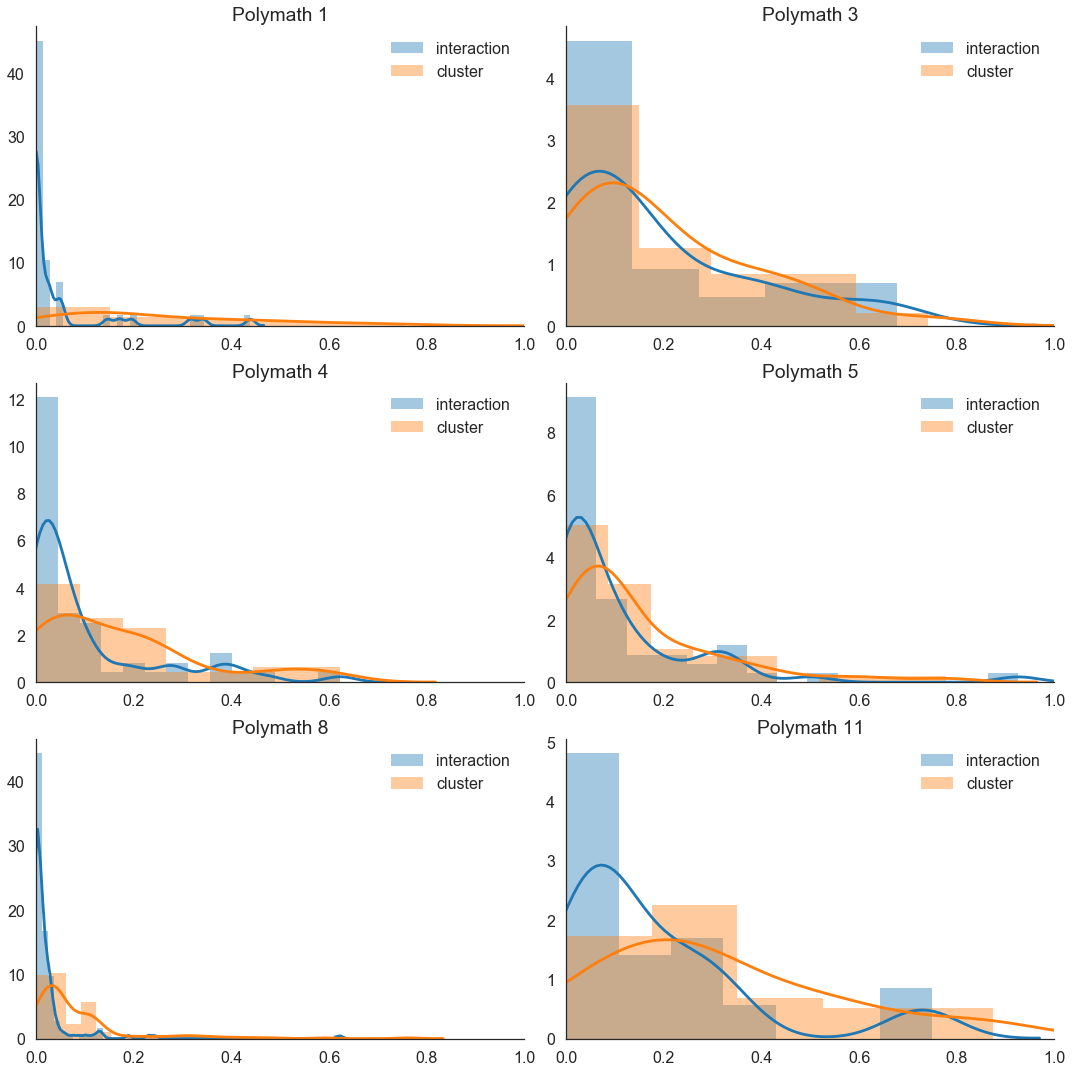

In [277]:
fig = plt.figure(figsize=(15,15))
for i, (project, network) in enumerate(all_networks.iteritems(), start=1):
    axes = fig.add_subplot(3, 2, i)
    for g_type in ['interaction', 'cluster']:
        the_measures = network._AuthorNetwork__get_centrality_measures(g_type)['{} degree centrality'.format(g_type)]
        sns.distplot(the_measures, ax=axes, label=g_type)
    axes.set_title(project)
    axes.set_xlabel('')
    axes.set_xlim([0, 1])
    plt.legend()
plt.tight_layout()
sns.despine()

In [298]:
pm4_by_thread = PM_FRAME.loc['Polymath 4']['research threads', 'mthread (single)'].dropna().apply(an.AuthorNetwork)
pm4_by_thread = pm4_by_thread.append(Series([PM_FRAME.loc['Polymath 4']['research threads', 'network'].dropna().iloc[-1]]))
pm4_by_thread.index = ["thread {}".format(i) for i in range(1, 6)] + ["project"]

In [299]:
pm4_by_thread

thread 1    <author_network.AuthorNetwork object at 0x1a18...
thread 2    <author_network.AuthorNetwork object at 0x1a1a...
thread 3    <author_network.AuthorNetwork object at 0x1a2b...
thread 4    <author_network.AuthorNetwork object at 0x1a2f...
thread 5    <author_network.AuthorNetwork object at 0x1a1c...
project     <author_network.AuthorNetwork object at 0x1a1e...
dtype: object

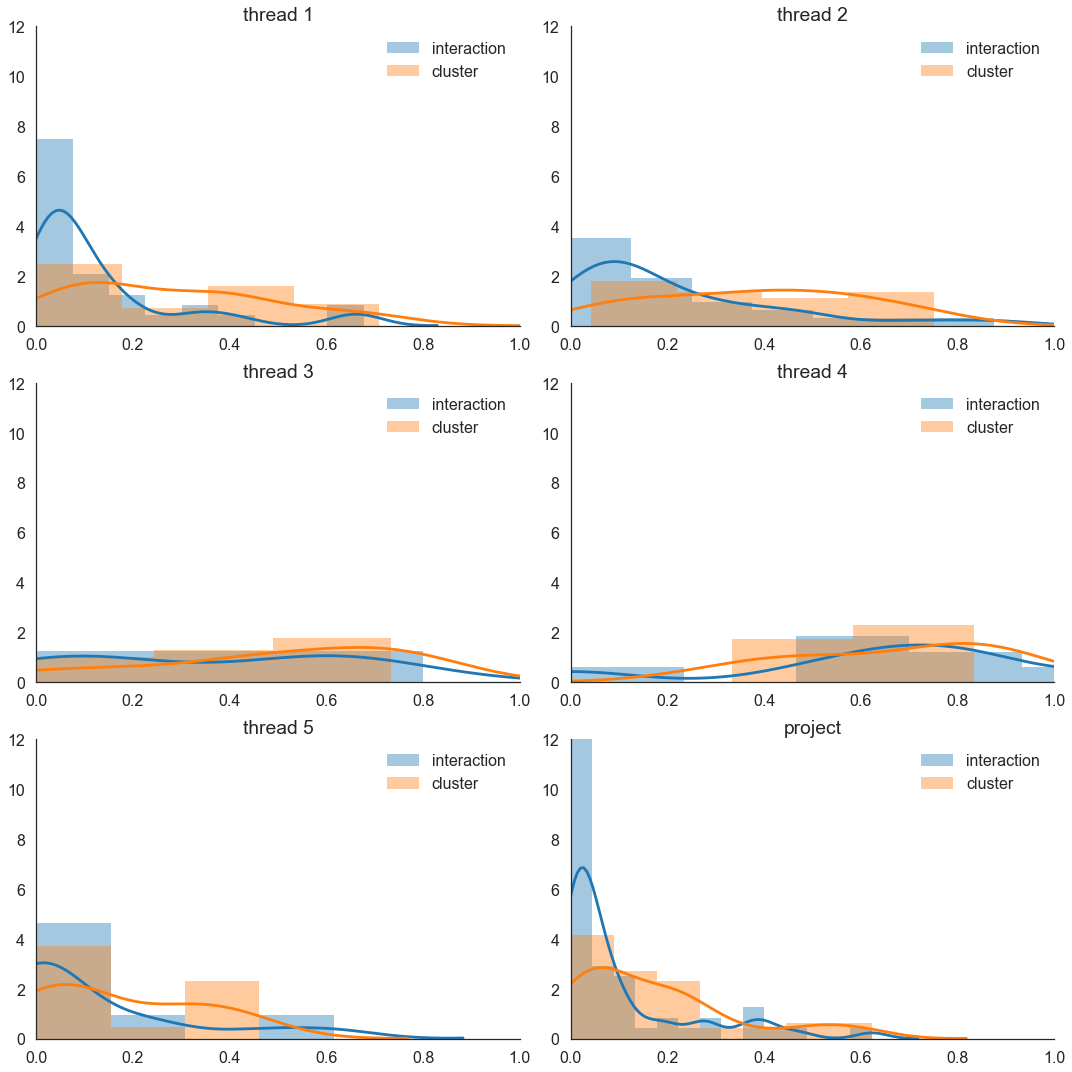

In [301]:
fig = plt.figure(figsize=(15,15))
for i, (thread, network) in enumerate(pm4_by_thread.iteritems(), start=1):
    axes = fig.add_subplot(3, 2, i)
    for g_type in ['interaction', 'cluster']:
        the_measures = network._AuthorNetwork__get_centrality_measures(g_type)['{} degree centrality'.format(g_type)]
        sns.distplot(the_measures, ax=axes, label=g_type)
    axes.set_title(thread)
    axes.set_xlabel('')
    axes.set_xlim([0, 1])
    axes.set_ylim([0, 12])
    plt.legend()
plt.tight_layout()
sns.despine()

## Fitting lines to network-measures etc. (looking for powerlaw)

In [116]:
pm4_netw = get_project_at(PM_FRAME, "Polymath 4", thread_type="research threads", stage=-1).network

In [117]:
from seaborn import distplot
import seaborn as sns
sns.set_style('white')

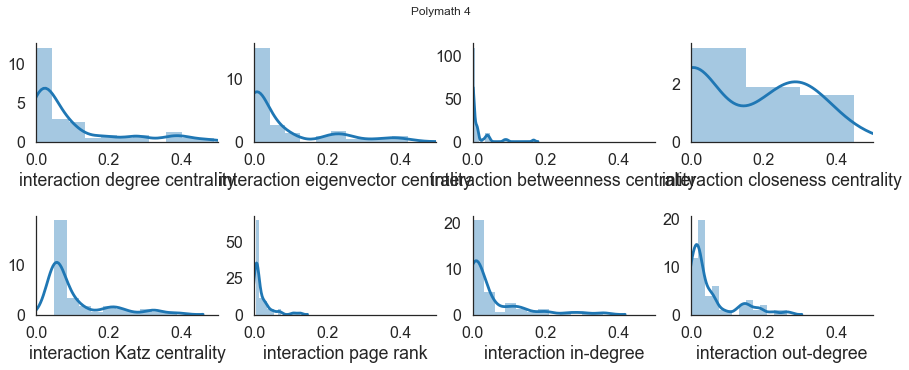

In [118]:
pm4_meas = pm4_netw._AuthorNetwork__get_centrality_measures("interaction")
fig = plt.figure(figsize=(15,5))
fig.suptitle("Polymath 4")
for i, col in enumerate(pm4_meas.columns, start=1):
    axes = fig.add_subplot(2, 4, i)
    axes.set_xlim(-0.1)
    distplot(pm4_meas[col],
        ax=axes)
    axes.set_xlim(0,0.5)
plt.subplots_adjust(hspace=.75)
sns.despine()

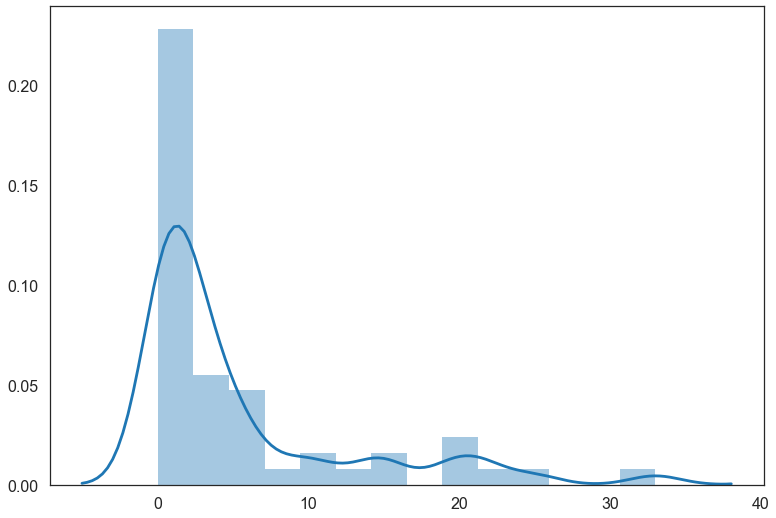

In [121]:
distplot(np.array([degree for _, degree in pm4_netw.i_graph.degree()]))

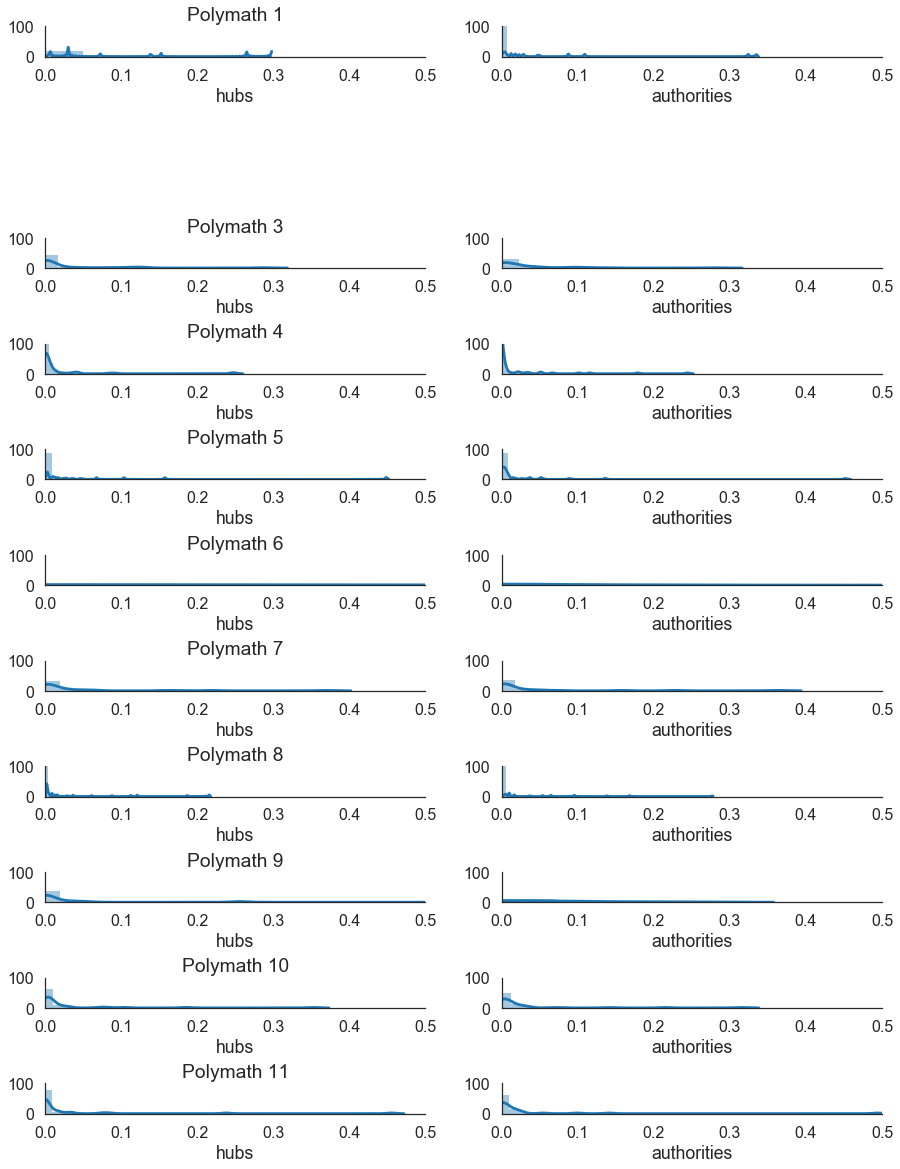

In [122]:
from itertools import product
fig = plt.figure(figsize=(15, 20))
for i, (project, col) in enumerate(product(range(1,12), ['hubs', 'authorities']), start=1):
    try:
        data = get_project_at(PM_FRAME, "Polymath {}".format(project), thread_type="research threads", stage=-1).network._AuthorNetwork__hits()[col]
    except ZeroDivisionError:
        continue
    else:
        axes = fig.add_subplot(11,2,i)
        distplot(data, ax=axes)
        if col == 'hubs':
            axes.set_title("Polymath {}".format(project))
        axes.set_xlim(0, 0.5)
        axes.set_ylim(0, 100)
plt.subplots_adjust(hspace=2.5)
sns.despine()

Calculating best minimal value for power law fit
Assuming nested distributions


2.22034494967
0.188303313843
truncated power_law vs power_law: (0.15235333266118256, 0.58094669920038933)
truncated power_law vs exponential: (12.981782629035793, 0.0087285154628326152)


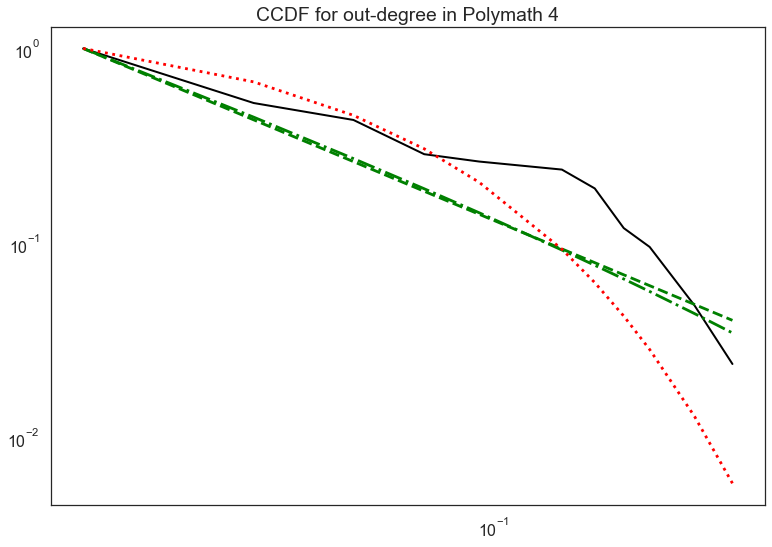

In [123]:
import powerlaw
data = get_project_at(PM_FRAME, "Polymath 4", thread_type="research threads", stage=-1).network._AuthorNetwork__get_centrality_measures("interaction", measures=['out-degree']).values
data = data[data.nonzero()]
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
#print("lognormal vs exponential:", fit.distribution_compare('lognormal', 'exponential'))
print("truncated power_law vs power_law:", fit.distribution_compare('truncated_power_law', 'power_law'))
print("truncated power_law vs exponential:", fit.distribution_compare('truncated_power_law', 'exponential'))
#print("truncated power_law vs stretched exponential:", fit.distribution_compare('truncated_power_law', 'stretched_exponential'))
#print("truncated power_law vs lognormal:", fit.distribution_compare('truncated_power_law', 'lognormal'), end="\n\n")
_, axes = plt.subplots()
fit.plot_ccdf(color='k', linewidth=2, ax=axes)
fit.power_law.plot_ccdf(color='g', linestyle='--', ax=axes)
fit.truncated_power_law.plot_ccdf(color='g', linestyle='-.', ax=axes)
fit.exponential.plot_ccdf(color='r', linestyle=':', ax=axes)
axes.set_title("CCDF for out-degree in Polymath 4")


Calculating best minimal value for power law fit
Assuming nested distributions


2.84134734864
0.531551193704
truncated power_law vs power_law: (0.52346632216041078, 0.30621458553846903)
truncated power_law vs exponential: (0.068143783726999363, 0.84288880217721296)


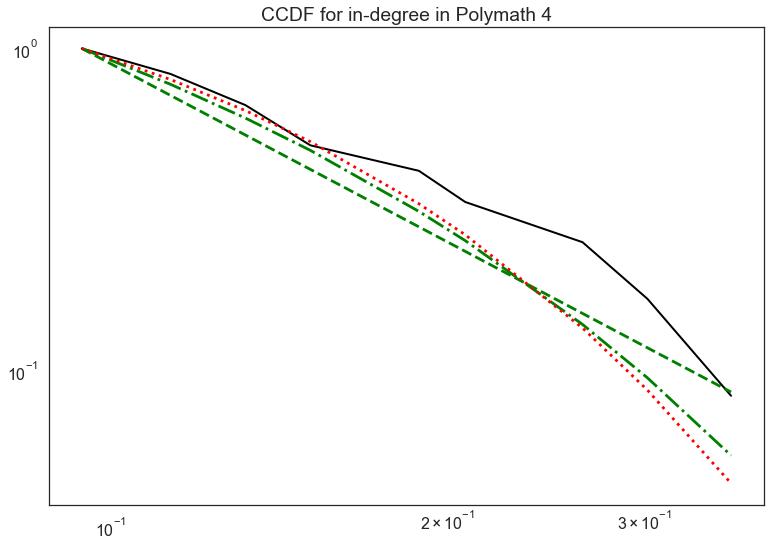

In [124]:
data = get_project_at(PM_FRAME, "Polymath 4", thread_type="research threads", stage=-1).network._AuthorNetwork__get_centrality_measures("interaction", measures=['in-degree']).values
data = data[data.nonzero()]
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
#print("lognormal vs exponential:", fit.distribution_compare('lognormal', 'exponential'))
print("truncated power_law vs power_law:", fit.distribution_compare('truncated_power_law', 'power_law'))
print("truncated power_law vs exponential:", fit.distribution_compare('truncated_power_law', 'exponential'))
#print("truncated power_law vs stretched exponential:", fit.distribution_compare('truncated_power_law', 'stretched_exponential'))
#print("truncated power_law vs lognormal:", fit.distribution_compare('truncated_power_law', 'lognormal'), end="\n\n")
_, axes = plt.subplots()
fit.plot_ccdf(color='k', linewidth=2, ax=axes)
fit.power_law.plot_ccdf(color='g', linestyle='--', ax=axes)
fit.truncated_power_law.plot_ccdf(color='g', linestyle='-.', ax=axes)
fit.exponential.plot_ccdf(color='r', linestyle=':', ax=axes)
axes.set_title("CCDF for in-degree in Polymath 4")

Calculating best minimal value for power law fit
Assuming nested distributions


1.73161048299
0.143480620351
truncated power_law vs power_law: (0.59500402303139466, 0.2753279333072135)
truncated power_law vs exponential: (13.181291266855435, 0.0081824589733578493)
truncated power_law vs lognormal: (0.41225379986745092, 0.15427927873644456)


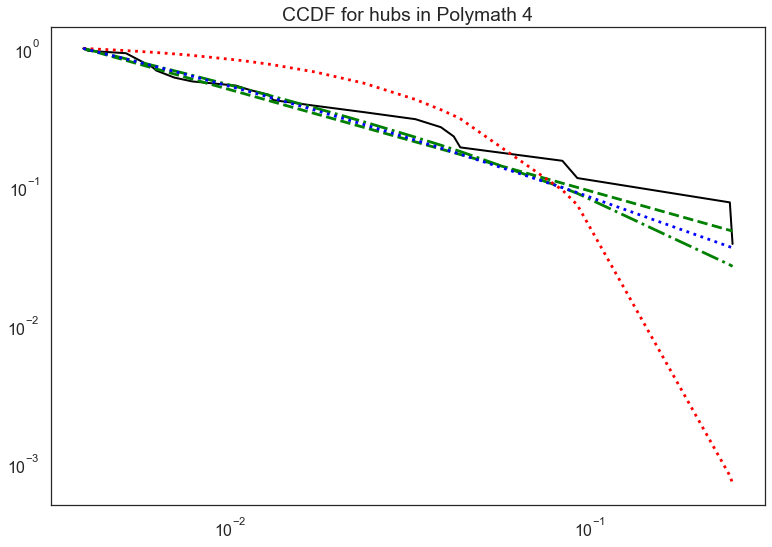

In [125]:
data = get_project_at(PM_FRAME, "Polymath 4", thread_type="research threads", stage=-1).network._AuthorNetwork__hits().hubs.values
data = data[data.nonzero()]
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
#print("lognormal vs exponential:", fit.distribution_compare('lognormal', 'exponential'))
print("truncated power_law vs power_law:", fit.distribution_compare('truncated_power_law', 'power_law'))
print("truncated power_law vs exponential:", fit.distribution_compare('truncated_power_law', 'exponential'))
print("truncated power_law vs lognormal:", fit.distribution_compare('truncated_power_law', 'lognormal'))
#print("truncated power_law vs stretched exponential:", fit.distribution_compare('truncated_power_law', 'stretched_exponential'))
#print("truncated power_law vs lognormal:", fit.distribution_compare('truncated_power_law', 'lognormal'), end="\n\n")
_, axes = plt.subplots()
fit.plot_ccdf(color='k', linewidth=2, ax=axes)
fit.power_law.plot_ccdf(color='g', linestyle='--', ax=axes)
fit.truncated_power_law.plot_ccdf(color='g', linestyle='-.', ax=axes)
fit.exponential.plot_ccdf(color='r', linestyle=':', ax=axes)
fit.lognormal.plot_ccdf(color='b', linestyle=':', ax=axes)
axes.set_title("CCDF for hubs in Polymath 4")

Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 1
lognormal vs power_law: (1.3307082158339634, 0.045403781753707476)
truncated power_law vs power_law: (2.6265487926039834, 0.021907738144611111)
truncated power_law vs exponential: (40.525606598825391, 1.6556340012151906e-05)
truncated power_law vs stretched exponential: (0.94760772648326408, 0.020580803095918292)
truncated power_law vs lognormal: (1.2958405767700201, 0.050413522447026009)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 2
lognormal vs power_law: (0.80370475834851074, 0.31561926736210288)
truncated power_law vs power_law: (1.1359127264325295, 0.13174464283400666)
truncated power_law vs exponential: (0.88703268921620237, 0.52035643514827279)
truncated power_law vs stretched exponential: (0.11255241667356253, 0.54660218484018552)
truncated power_law vs lognormal: (0.33220796808401887, 0.078485963303320846)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 3
lognormal vs power_law: (3.3707875871202382, 0.05256321040501144)
truncated power_law vs power_law: (4.7963129019179194, 0.0019536036617409103)
truncated power_law vs exponential: (9.6705319067428661, 0.02025145650891063)
truncated power_law vs stretched exponential: (0.69152835843786953, 0.027458700704951058)
truncated power_law vs lognormal: (1.4255253147976803, 0.035733064237891063)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 4
lognormal vs power_law: (1.1262234094372743, 0.01533049281394701)
truncated power_law vs power_law: (1.8207466708702191, 0.056356363922803077)
truncated power_law vs exponential: (32.92260923670419, 6.2373181977638979e-05)
truncated power_law vs stretched exponential: (0.51894999587256097, 0.08153345069439831)
truncated power_law vs lognormal: (0.69452326143294485, 0.12788009442770798)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 5
lognormal vs power_law: (1.8553945916107675, 0.076395333808229743)
truncated power_law vs power_law: (2.4855471184461377, 0.025774336541156573)
truncated power_law vs exponential: (59.932847328059559, 0.00026622739271076068)
truncated power_law vs stretched exponential: (0.41526497289777931, 0.32232773741862308)
truncated power_law vs lognormal: (0.63015252683537026, 0.25691308390359724)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 6
lognormal vs power_law: (1.4418751085020249, 0.19660264667208838)
truncated power_law vs power_law: (1.1192057518120129, 0.13461921321950066)
truncated power_law vs exponential: (-0.3902859154145224, 0.47382308638828308)
truncated power_law vs stretched exponential: (-0.44249618142115166, 0.57444952123490567)
truncated power_law vs lognormal: (-0.32266935669001207, 0.67873359481259987)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 7
lognormal vs power_law: (0.86926628381909676, 0.32570515706886927)
truncated power_law vs power_law: (1.2725307051717889, 0.11063960907618198)
truncated power_law vs exponential: (8.3087448180644543, 0.01655471318521266)
truncated power_law vs stretched exponential: (0.28555563732709355, 0.31651705801247065)
truncated power_law vs lognormal: (0.40326442135269214, 0.32270280207643853)

Polymath 8


Calculating best minimal value for power law fit
Assuming nested distributions


lognormal vs power_law: (0.066734313194313222, 0.24438369346364319)
truncated power_law vs power_law: (0.64892233082670248, 0.25460729654974001)
truncated power_law vs exponential: (54.852747420849568, 1.7927629579807869e-07)
truncated power_law vs stretched exponential: (0.81046888140025231, 0.0060221192401086806)
truncated power_law vs lognormal: (0.58218801763238925, 0.26088200181557086)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 9
lognormal vs power_law: (0.39190959901804168, 0.40686791664614153)
truncated power_law vs power_law: (0.43074735264376007, 0.35332074675579062)
truncated power_law vs exponential: (6.3682069828934926, 0.066788437403923887)
truncated power_law vs stretched exponential: (0.011544329064338443, 0.95057463073022641)
truncated power_law vs lognormal: (0.038837753625718396, 0.88404639182843425)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 10
lognormal vs power_law: (0.12728109635733298, 0.37568184020793072)
truncated power_law vs power_law: (0.4330995544669769, 0.35200970955694177)
truncated power_law vs exponential: (13.615023380128687, 0.006992776769825639)
truncated power_law vs stretched exponential: (0.28362933883271246, 0.13404990423919919)
truncated power_law vs lognormal: (0.30581845810964392, 0.37049179589753889)



Calculating best minimal value for power law fit
Assuming nested distributions


Polymath 11
lognormal vs power_law: (2.5167006765910425, 0.08593729847975963)
truncated power_law vs power_law: (2.7872677004992861, 0.018223499278663513)
truncated power_law vs exponential: (17.065509441476088, 0.0092545701969444418)
truncated power_law vs stretched exponential: (0.15805532559148339, 0.66471505031475753)
truncated power_law vs lognormal: (0.27056702390824405, 0.65045632494158068)



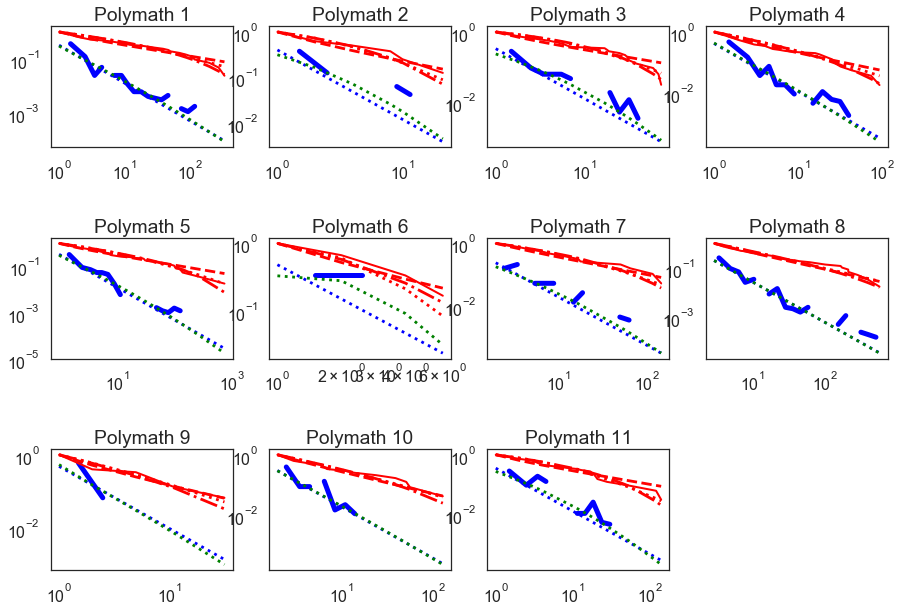

In [126]:
fig = plt.figure(figsize=(15,10))
for i in range(1,12):
    project = "Polymath {}".format(i)
    axes = fig.add_subplot(3, 4, i)
    data = get_project_at(
        PM_FRAME, project, thread_type="research threads", stage=-1).network.author_frame[
        'total comments'].values
    fit = powerlaw.Fit(data, discrete=True)
    print(project)
    #print(fit.power_law.alpha)
    #print(fit.power_law.sigma)
    print("lognormal vs power_law:", fit.distribution_compare('lognormal', 'power_law'))
    print("truncated power_law vs power_law:", fit.distribution_compare('truncated_power_law', 'power_law'))
    print("truncated power_law vs exponential:", fit.distribution_compare('truncated_power_law', 'exponential'))
    print("truncated power_law vs stretched exponential:", fit.distribution_compare('truncated_power_law', 'stretched_exponential'))
    print("truncated power_law vs lognormal:", fit.distribution_compare('truncated_power_law', 'lognormal'), end="\n\n")
    fit.plot_pdf(color='b', linewidth=5, ax=axes)
    fit.power_law.plot_pdf(color='b', linestyle=':', ax=axes)
    fit.lognormal.plot_pdf(color='g', linestyle=':', ax=axes)
    fit.plot_ccdf(color='r', linewidth=2, ax=axes)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=axes)
    fit.lognormal.plot_ccdf(color='r', linestyle=':', ax=axes)
    fit.truncated_power_law.plot_ccdf(color='r', linestyle='-.', ax=axes)
    axes.set_title(project)
plt.subplots_adjust(hspace=.75)

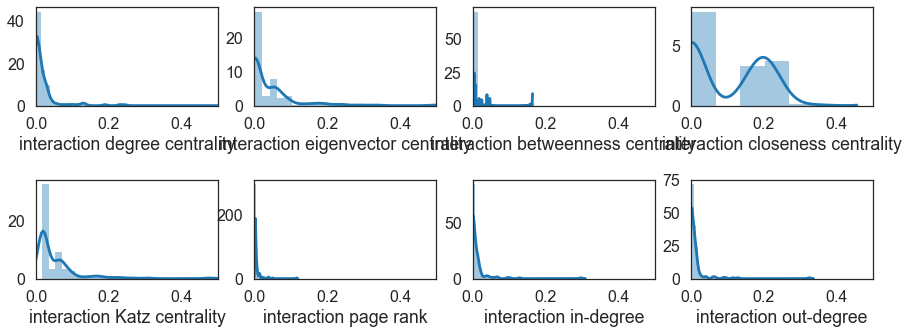

In [127]:
pm8_meas = get_project_at(PM_FRAME, "Polymath 8", thread_type="research threads", stage=-1).network._AuthorNetwork__get_centrality_measures("interaction")
fig = plt.figure(figsize=(15,5))
for i, col in enumerate(pm8_meas.columns, start=1):
    axes = fig.add_subplot(2, 4, i)
    axes.set_xlim(-0.1)
    distplot(pm8_meas[col],
        ax=axes)
    axes.set_xlim(0,0.5)
plt.subplots_adjust(hspace=.75)

In [128]:
data = pm8_meas['interaction Katz centrality'][pm8_meas['interaction Katz centrality'].nonzero()[0]].values
data = data*1000

In [129]:
pm8_meas_c = get_project_at(PM_FRAME, "Polymath 8", thread_type="research threads", stage=-1).network._AuthorNetwork__get_centrality_measures("cluster")
fig = plt.figure(figsize=(15,5))
for i, col in enumerate(pm8_meas_c.columns, start=1):
    axes = fig.add_subplot(2, 3, i)
    axes.set_xlim(-0.1)
    distplot(pm8_meas_c[col],
        ax=axes)
    axes.set_xlim(0,0.5)
plt.subplots_adjust(hspace=.75)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [ ]:
# check again if it works without supplying measures.
plot_centrality_measures(PM_FRAME, "Polymath 8", thread_type="research threads",
                         stage=-1, g_type="interaction")

## Grouping projects based  on distribution of comments

In [131]:
comment_data = get_last(PM_FRAME, "research threads")[0]['research threads'][
    ['authors (accumulated)', "comment_counter"]]
comment_data.index = comment_data.index.droplevel(1)
max_authors = comment_data['authors (accumulated)'].apply(len).max()
comment_df = DataFrame(np.zeros([max_authors, 13], dtype='int'), columns=comment_data.index, index=range(1, max_authors+1))
comment_df.index.name = 'rank'
for project in comment_data.index:
    for_col = sorted(list(comment_data.loc[project, "comment_counter"].values()), reverse=True)
    comment_df.loc[:len(for_col),project] = for_col
comment_df = comment_df.div(comment_df.sum(axis=0), axis=1).multiply(100)

In [132]:
comment_matrix = comment_df.values
Z_project = linkage(comment_matrix.T, method="average", metric="euclidean")
c, _ = cophenet(Z_project, pdist(comment_matrix.T))
print("Cophenetic correlation coeff: ", c)
ddata_project = dendrogram(Z_project, color_threshold=16,
                                  no_plot=True)
cols = [comment_df.columns[i] for i in ddata_project['leaves']]
comment_df = comment_df[cols]

Cophenetic correlation coeff:  0.827552574148


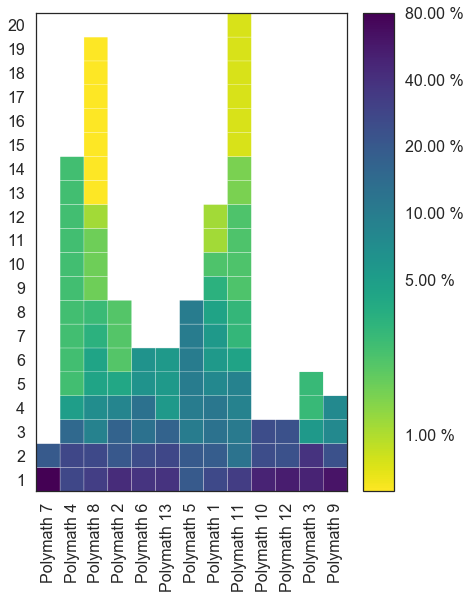

In [133]:
n = 20
fig, axes = plt.subplots()
my_lognorm = matplotlib.colors.LogNorm(vmax=comment_df.values.max())
hmap = axes.pcolor(comment_df.iloc[:n], edgecolors='w', cmap='viridis_r', norm=my_lognorm)
#axes.autoscale(tight=True)
axes.set_aspect('equal')
axes.set_yticks(np.arange(0.5, n + .5, 1))
axes.set_yticklabels(comment_df.index[:n])
axes.set_xticks(np.arange(len(comment_df.columns)) + 0.5)
axes.set_xticklabels(comment_df.columns, rotation=90)
divider_h = make_axes_locatable(axes)
cax = divider_h.append_axes("right", "10%", pad="5%")
#un_vals = np.unique(df.values)
plt.colorbar(hmap, cax=cax, ticks=[1, 5, 10, 20, 40, 80])
cax.yaxis.set_major_formatter(
            FuncFormatter(
                lambda y, pos: ('{:.2f} %'.format(my_lognorm.inverse(y)))))

**Next step:** do this with network-measures

In [134]:
measure_data = get_last(PM_FRAME, "research threads")[0]['research threads'][
    ['authors (accumulated)', "network"]]
measure_data.index = measure_data.index.droplevel(1)
max_authors = measure_data['authors (accumulated)'].apply(len).max()
for measure in ['degree centrality', 'eigenvector centrality', 'page rank', 'closeness centrality']:
    measure_data[measure] = measure_data['network'].apply(lambda netw: netw._AuthorNetwork__get_centrality_measures("interaction", measures=[measure], weight='weight'))


In [137]:
def df_for_heatmap(input_data, column):
    max_authors = measure_data['authors (accumulated)'].apply(len).max()
    out_data = DataFrame(np.zeros([max_authors, 13]), columns=input_data.index, index=range(1, max_authors+1))
    out_data.index.name = 'rank'
    for project in input_data.index:
        for_col = minmax_scale(input_data.loc[project, column].iloc[:, 0].values)
        out_data.loc[:len(for_col), project] = for_col
    return out_data

def cluster_and_reorder(input_data):
    data_matrix = input_data.values
    Z_project = linkage(data_matrix.T, method="average", metric="euclidean")
    c, _ = cophenet(Z_project, pdist(data_matrix.T))
    print("Cophenetic correlation coeff: ", c)
    ddata_project = dendrogram(Z_project, color_threshold=.4,
                               no_plot=True)
    cols = [input_data.columns[i] for i in ddata_project['leaves']]
    return input_data[cols]

def plot_as_heatmap(hmap_data, fig=None, n=20, i=None, title=None):
    if not fig:
        fig, axes = plt.subplots()
    else:
        axes = fig.add_subplot(2, 2, i)
    hmap = axes.pcolor(hmap_data.iloc[:n], edgecolors='w', cmap='Greys')
    axes.set_aspect('equal')
    axes.set_yticks(np.arange(0.5, n + .5, 1))
    axes.set_yticklabels(hmap_data.index[:n])
    axes.set_xticks(np.arange(len(hmap_data.columns)) + 0.5)
    axes.set_xticklabels(hmap_data.columns, rotation=90)
    axes.set_title(title)
    divider_h = make_axes_locatable(axes)
    cax = divider_h.append_axes("right", "10%", pad="5%")
    plt.colorbar(hmap, cax=cax, ticks=[0, .2, .4, .6, .8, 1])

Cophenetic correlation coeff:  0.885824366441
Cophenetic correlation coeff:  0.910514202852
Cophenetic correlation coeff:  0.909226217607
Cophenetic correlation coeff:  0.908101470929


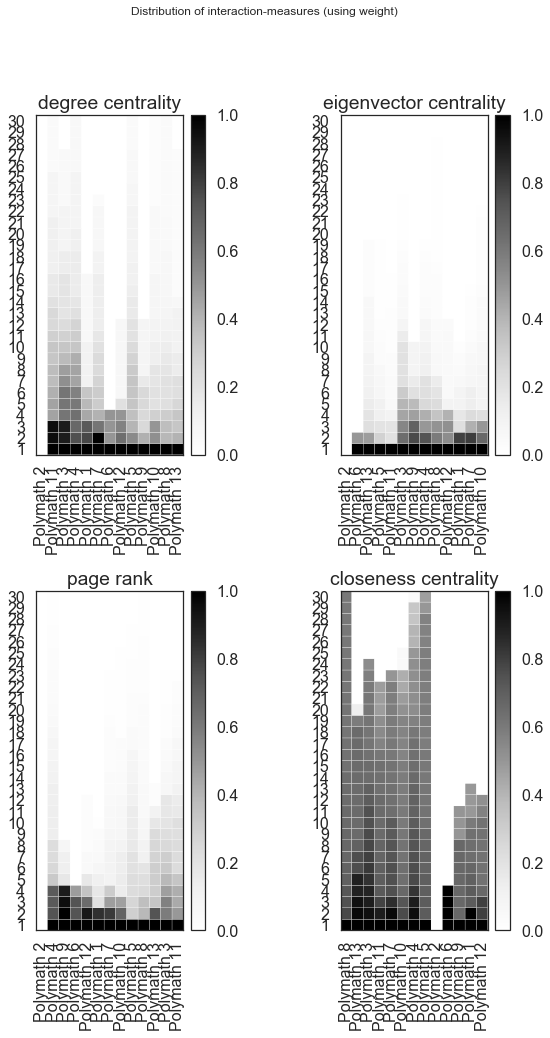

In [138]:
fig = plt.figure(figsize=(10,15))
fig.suptitle("Distribution of interaction-measures (using weight)")
for i, measure in enumerate(measure_data.columns[2:], start=1):
    data = cluster_and_reorder(df_for_heatmap(measure_data, measure))
    plot_as_heatmap(data, fig=fig, i=i, title=measure, n=30)
plt.subplots_adjust(hspace=.4)

Cophenetic correlation coeff:  0.885824366441
Cophenetic correlation coeff:  0.925215895063
Cophenetic correlation coeff:  0.883103059131
Cophenetic correlation coeff:  0.908101470929


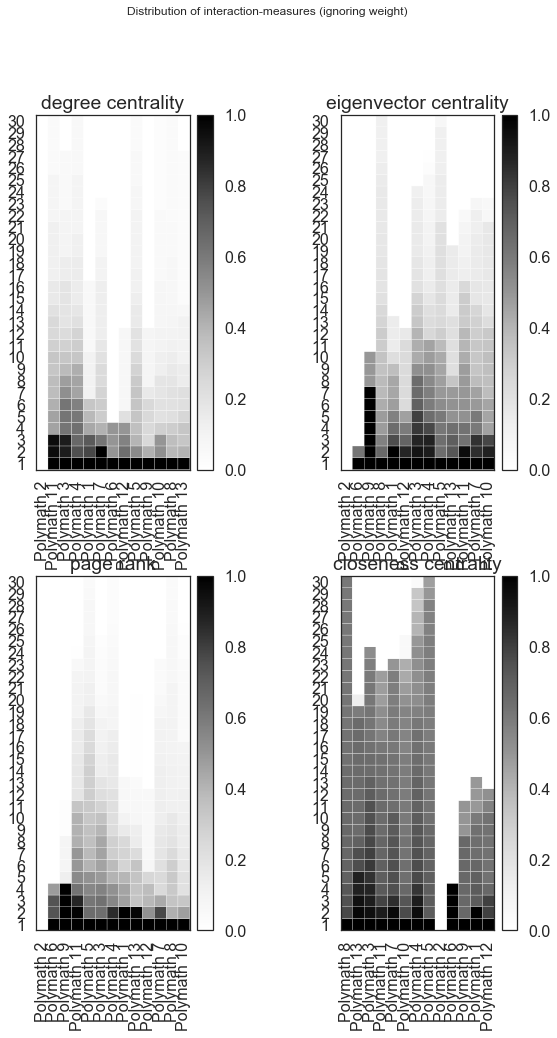

In [139]:
measure_data2 = get_last(PM_FRAME, "research threads")[0]['research threads'][
    ['authors (accumulated)', "network"]]
measure_data2.index = measure_data2.index.droplevel(1)
max_authors2 = measure_data2['authors (accumulated)'].apply(len).max()
for measure in ['degree centrality', 'eigenvector centrality', 'page rank', 'closeness centrality']:
    measure_data2[measure] = measure_data2['network'].apply(lambda netw: netw._AuthorNetwork__get_centrality_measures("interaction", measures=[measure], weight=None))

fig2 = plt.figure(figsize=(10,15))
fig2.suptitle("Distribution of interaction-measures (ignoring weight)")
for i, measure in enumerate(measure_data2.columns[2:], start=1):
    data = cluster_and_reorder(df_for_heatmap(measure_data2, measure))
    plot_as_heatmap(data, fig=fig2, i=i, title=measure, n=30)
plt.subplots_adjust(hspace=.3)

## A quick look at Polymath 12

In [ ]:
draw_network(PM_FRAME, project="Polymath 12", thread_type="all threads", stage=-1, fontsize=10)

In [ ]:
plot_activity_degree(PM_FRAME, "Polymath 12", measures=["in-degree", "out-degree"], fontsize=10)

In [ ]:
plot_scatter_authors(PM_FRAME, "Polymath 12", measure='degree centrality', thresh=1, fontsize=10)

## Small-world effects etc.

In [ ]:
PM4_netw = get_project_at(PM_FRAME, "Polymath 4", thread_type="all threads", stage=-1).network

In [ ]:
main_component = next(PM4_netw.w_connected_components('interaction'))

In [ ]:
PM4_main_c = nx.DiGraph(PM4_netw.i_graph.edges())
PM4_main_c = PM4_main_c.subgraph(list(main_component))
print("nodes: ", PM4_main_c.number_of_nodes(),"edges: ", PM4_main_c.number_of_edges())

In [ ]:
PM4_avg_path = nx.average_shortest_path_length(PM4_main_c)

In [ ]:
edges = []
for i in range(10000):
    comparison_graph = nx.erdos_renyi_graph(47, .075, seed=i, directed=True)
    if nx.is_weakly_connected(comparison_graph) and comparison_graph.number_of_edges() == 161:
        edges.append(comparison_graph.number_of_edges())
paths = Series(edges)
print(paths.describe())
print("Normalised path-length: ", PM4_avg_path / paths.mean())

We could also look at how the shortest path-length increased within a single project

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(20, 10))
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
fig.suptitle("Evolution of average shortest path-length (x=number of nodes in largest weakly connected component)")
for i in range(1, 13):
    nodes = []
    edges = []
    paths = []
    for stage in range(0, 100):
        try:
            network = get_project_at(PM_FRAME, "Polymath {}".format(i), thread_type="all threads", stage=stage).network
        except IndexError:
            break
        else:
            main_component = next(network.w_connected_components('interaction'))
            network_main_c = nx.DiGraph(network.i_graph.edges()).subgraph(list(main_component))
            if network_main_c.number_of_nodes() > 1:
                nodes.append(network_main_c.number_of_nodes())
                edges.append(network_main_c.number_of_edges())
                paths.append(nx.average_shortest_path_length(network_main_c))
            else:
                continue
    axes = fig.add_subplot(3, 4, i)
    axes.set_title("Polymath {}".format(i), fontsize=14)
    try:
        sns.regplot(np.array(nodes), np.array(paths), logx=True, ax=axes, color="Gray")
    except ValueError:
        pass
plt.subplots_adjust(hspace=.6)

## Gradually removing edges (and nodes)

In [ ]:
for i in range(1, 13):
    plot_edge_removal(PM_FRAME, "Polymath {}".format(i), n=10, thread_type="research threads", g_type="cluster")

In [ ]:
plot_edge_removal?

In [ ]:
plot_node_removal(PM_FRAME, "Polymath 1", n=5)

In [ ]:
plot_node_removal(PM_FRAME, "Polymath 9")

### Generalising to the whole community

In [ ]:
# gives an error due to overlapping comment-id's
#mthread_all = mct.MultiCommentThread(*PM_FRAME["basic", "thread"].tolist())

In [ ]:
#network_all = an.AuthorNetwork(mthread_all)

In [ ]:
#network_all.w_connected_component("interaction")

## Looking at daily patterns of individual participants

In [ ]:
data_pm8 = get_project_at(PM_FRAME, "Polymath 8", thread_type= "research threads", stage=-1).network.author_frame

In [ ]:
top_participants = data_pm8['timestamps'].apply(len).nlargest(16).index

In [ ]:
a_time = data_pm8.loc["Terence Tao", 'timestamps'][0].time()

In [ ]:
_, axes = plt.subplots(8,2)
for ind, participant in enumerate(top_participants):
    time_data = data_pm8.loc[participant, 'timestamps']
    times = Series((stamp.time().hour * 60 + stamp.time().minute for stamp in time_data))
    ax=axes.flatten()[ind]
    times.plot(kind='kde', ax=ax, title=participant)
    ax.set_xlim([0,24*60])
plt.subplots_adjust(hspace=2)

## Function to save author-data as csv

In [ ]:
def create_and_save_author_frame(project, thread_type):
    network = get_project_at(PM_FRAME, project, thread_type=thread_type, stage=-1).network
    data = pd.concat([network.author_frame,
                      network._AuthorNetwork__get_centrality_measures('interaction'),
                      network._AuthorNetwork__get_centrality_measures('cluster')], axis=1)
    data.to_csv("OUTPUT/{}_author_data.csv".format(project.replace(" ", "")))

In [ ]:
for i in range(1, 13):
    create_and_save_author_frame("Polymath {}".format(i), "all threads")

## Play with Sankey

In [ ]:
components = list(get_project_at(PM_FRAME, "Polymath 4", thread_type="research threads", stage=-1).network.w_connected_components(graph_type="interaction"))

In [ ]:
list(map(len, components))

In [ ]:
from matplotlib.sankey import Sankey

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Flow")
flows = list(map(len, components))
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=[.42, -.38, -.1, -.1, -.1, -.1], label='one',
           orientations=[1, -1, -1, -1, -1, -1])

diagrams = sankey.finish()
#diagrams[-1].patch.set_hatch('/')
plt.legend(loc='best')

## Use this to search for specific comments or terms

In [ ]:
thread_type = "all threads"
keywords = {}

for m_thread in get_last(PM_FRAME, thread_type=thread_type)[0][thread_type, "mthread (accumulated)"]:
    for node, data in m_thread.graph.nodes_iter(data=True):
        if all(keyword in data["com_tokens"] for keyword in keywords):
            print(node, " by {} on {}".format(data["com_author"], data["com_timestamp"]), end="\n")
            print(data["com_thread"].path)
            print(data["com_content"], end="\n\n")